# Raphaël Pellegrin, Gaël Ancel, David Assaraf

Supervisors: Théo Guénais and  Dimitris Vamvourellis

Paper selected: BaCOUn: Bayesian Classifers with Out-of-Distribution Uncertainty

We would like to pursue research in the spring, if possible.

# Part I

# I - Problem statement:

## "What is the problem the paper aims to solve?"

Some classifiers yield models that make confident predictions for OOD points. We can partially resolve this issue by working with non-linear classifiers but often the boundaries will not properly bound the data. While some techniques exist to accurately return a high uncertainty for OOD points (Gaussian processes, Bayesian approaches coupled with Neural Networks), they are computationally expensive. The authors propose a computationally tractable recipe to accurately capture prediction uncertainties.

# II - Context and scope

## "Why is this problem important or interesting?"

It is important to get a notion of the uncertainty associated to a prediction if the classifier is used for some real-world application (in the medical sector or for an air plane system for example). If the uncertainty associated to the prediction is too high, it might be necessary for a human supervisor to take the decision. We can distinguish two kinds of uncertainty.

### A - Epistemic uncertainty and aleatoric uncertainty

Epidemic uncertainty is uncertainty that is due to a lack of observations. It can be reduced with further observations. aleatoric uncertainty is uncertainty that is due to the intrinsic uncertainty in the data, and can't be reduced with further observations.

In the case of classifiers, the uncertainty can have two causes: being far away from training points, and lying close to boundaries. Points lying far away from training points are called OOD points.

Having a model being able to distinguish epistemic uncertainty from aleatoric uncertainty is important because the causes of these uncertainties are different and a practitioner might deal with high epistemic uncertainty in a different manner than he would act in a situation with high aleatoric uncertainty.

# III - Existing work 

## "What has been done in literature?"

### Previous techniques to estimate the uncertainty in classification

### A - Gaussian Processes (GPs)

Gaussian Processes (GPs) have been the gold standard to estimate the uncertainty in classification. However, they become computationally intractable as the number of parameters grow. 

### B - Bayesian Neural Networks (BNNs)

It is possible to use Bayesian Neural Networks (BNN) by placing priors on all the weights of a neural net. It is important to note that a result of Neal (1996) shows that BNN are equivalent to GP in the infinite width limit. However, this is computationally intractable. Furthermore, BNN are not great for estimating the OOD uncertainty when their size is finite and small. Even then, it can be computationally expensive to train the model with priors on all the weights. 

Thus, we will see that the authors propose using Neural Linear Models (NLM), where priors are put on the weights in the last hidden layers were used instead of BNN. The remaining weights are learnt. Of course, this is not great for estimating the OOD uncertainty (it is more restrictive than BNN, which are not satisfactory already). However, the authors propose a solution to this problem by introducing an additional class of boundary points.

### C - Building on previous research

The paper BaCOUn: Bayesian Classifers with Out-of-Distribution Uncertainty aimed at improving OOD uncertainty quantification, for example exposed in the paper Predictive Uncertainty Estimation via Prior Networks by Andrey Malinin and Mark Gales.

# IV - Contribution

## "What is gap in literature that the paper is trying to fill?" 

### A - The authors solution

The authors show that BNN and NLM are not good at dealing with OOD uncertainty because the decision boundaries would need to bound the data. This is not encouraged when training BNN or NLM. This thus leads to poor uncertainty estimates (the uncertainty lies along the decision boundaries and stems from the diversity of boundaries that one gets when using a Bayesian approach). 

The authors propose a novel training framework that enables researchers to adequately capture OOD uncertainty by introducing a class of coundary points.

# V - Technical content - high level

## "What are the high level ideas behind their technical contribution"

BaCOUn is a framework of training (that is here applied to NLM, but could also be applied to BNN), that starts by generating an $n+1$th class of boundary points. That is, the authors add OOD samples at the boundary of the data (and use them to form the $n+1$th class). The classifier is then trained to distinguish between the training data ($n$ classes) and additionally between OOD points ($n+1$ class). Using the features learnt by this classifier, the authors fit a Bayesian logistic regression model on these features.  Then, to classify the augmented data (the $n$ original classes and the $n+1$ boundary class), decision boundaries that properly bound the original data will have to be learnt. 

The authors show that the OOD uncertainty estimates are comparable to the estimates produced by GPs.

# VI - Technical content

### A - Detailed explanation of NLMs

The data is $\mathcal{D}=\{(x_i,y_i)\}_{i=1}^{N}$. We have $N$ data points, $\{x_i\}_{i=1}^{N}$, that each belong to $\mathbb{R}^D$ and come with a label $y_i\in [n]:=\{1,\dots,n\}$. It is assumed that the labels come from a categorical distribution:

\begin{equation} y|x \sim \text{Cat}(\text{softmax}(W^T\phi_\theta(x))), W \sim p(W) \end{equation}

where, given $\{p_1, \dots, p_n\}$ the categorical random variable has support $[n]$ and probability mass function:

\begin{equation} p(x)=\prod_{i=1}^n p_i^{[x=i]} \end{equation}

and where, given $\mathbf{z}=(z_1,\dots, z_n)$, the softmax function is defined as:

\begin{equation} \sigma (\mathbf {z} )_{j}={\frac {\mathrm {e} ^{z_{j}}}{\sum _{k=1}^{K}\mathrm {e} ^{z_{k}}}} \end{equation} 

for all $ j \in \left\{1,\ldots ,n\right\}$. Thus, the softmax function is a function from $\mathbb{R}^n$ to $\mathbb{R}^n$.

$\phi_\theta$ is called the feature map because it extracts information from the data in order to proceed to classification. The feature map is trained to maximize the observed data log-likelihood:

\begin{equation} \theta^*=\arg \max_{\theta, W} p(y_1,\dots, y_N|x_1,\dots,x_N,\theta,W) \end{equation}

Then, the posterior for the weights $p(W|\theta^*, \mathcal{D})$ can be inferred using $\phi_{\theta*}$. The posterior is untractable so Hamiltonian Monte Carlo (HMC) or mean-field Gaussian variational inference is used.

It is then possible to make new predictions using:

\begin{align} p(y_{\text{new}}|x_{\text{new}},\mathcal{D},\theta^*) & =\int  p(y_{\text{new}},W|x_{\text{new}},\mathcal{D},,\theta^*) dW\\
& =\int  p(y_{\text{new}}|x_{\text{new}},\mathcal{D},\theta^*,W)p(W|x_{\text{new}},\mathcal{D},\theta^*) dW \\
& =\int  p(y_{\text{new}}|x_{\text{new}},\theta^*,W)p(W|\mathcal{D},\theta^*) dW   \end{align}


### B - Normalizing flows

The method proposed to generate OOD points was to use normalizing flows. 

In the simpler examples (data lying in an ambient space of dimensions $2$ and $3$), the OOD points were generated directly by the authors because they could visualize what the OOD points should be. But for more complex examples, the authors resorted to nomalizing flows. 

In a nutshell, normalizing flows involve a latent space, which is easier to work with. The OOD points in the latent space correspond to boundary points of the latent space. They are then sent back  to the original space.

#### a - Nitty gritty of normalizing flows

Normalizing flows are a family of generative models. They are transformations of a simple probability distribution into a more complicated one via a series of diffeomorphism. We can evaluate the density of a sample from the complex distribution by looking at the density of its pre-image in the simple distribution, multiplied by the appropriate change in volume induced by the transformations: this is given by the aboslute values of the determinant of the Jacobians of each transformation.

Standard applications of normalizing flows include density estimation and prior construction, but the one that interests us in is oulier detection.

Let $Z \in \mathbb{R}^D$ be a random variable with probability density function (pdf):
$$p_Z:  \mathbb{R}^D \rightarrow \mathbb{R}$$ 
Then, for a diffeomorphism $g$, we can let $Y:=g(Z)$.

We then have:

\begin{align} F_Y(y)&= P(Y\leq y)  \\
&=P(g(Z)\leq y)\\
&=P(Z \leq g^{-1}(y))\\
&=F_Z(g^{-1}(y)) \end{align}

Thus:

\begin{align} p_Y(y)=p_Z(g^{-1}(y))|det Df(y)| \end{align}

where $f:=g^{-1}$. 

Definition: $p_Y(y)$ is called the pushforward of the density $p_Z(z)$. $Z$ is called the base distribution, and the movement from $Z$ to $Y$ is called the generative direction. The inverse of $g$, $f$, moves in the normalizing direction. This explains the name normalizing direction.

In practice, we choose the diffeomorphism with a neural network (Papamakarios et al.)

There a different types of flows: the kinds discussed in the paper Normalizing Flows: An Introduction and Review of Current Methods by Ivan Kobyzev, Simon J.D. Prince, and Marcus A. Brubaker are elementwise flows, linear flows, planar and radial flows, coupling and autoregressive flows, residual flows, infinitesimal (continuous flows).

Element wise flows use a bijection $h: \mathbb{R} \rightarrow \mathbb{R}$ to construct the bijection $g: \mathbb{R}^D \rightarrow \mathbb{R}^D$:

$$ g((x_1, \dots, x_D)^T) \mapsto (h(x_1), \dots, h(x_D))^T $$

Linear flows correspond to a function $g: \mathbb{R}^D \rightarrow \mathbb{R}^D$ such that:

$$ g(x)=Ax+b$$
where $A \in \mathbb{R}^{D\times D}$ and $b \in \mathbb{R}^{D}$.

The most used flows are coupling and autoregressive flows.

### C - Uncertainty quantification

The authors follow the uncertainty decomposition introduced in the paper Decomposition of uncertainty for active learning and reliable reinforcement learning in stochastic
systems by Depeweg, S, Hernandez-Lobato, JM, Doshi-Velez, F, 
and Udluft, S.

That is:

The total uncertainty is defined as $\mathbb{H}(\mathbb{E}_{p(W|D)}[p(y|x^*,W)])$, while the expected aleatoric uncertainty is defined as: $\mathbb{E}_{p(W|D)}(\mathbb{H}([p(y|x^*,W)])$. Their difference is the mutual information (MI) and is a measure of the epistemic uncertainty:

\begin{equation} I(y, W| x^*, \mathcal{D})= \mathbb{H}(\mathbb{E}_{p(W|\mathcal{D})}[p(y|x^*,W)]) - \mathbb{E}_{p(W|\mathcal{D})}(\mathbb{H}([p(y|x^*,W)]) \end{equation}

# VII- Experiments 

## "Which types of experiments were performed?" 

Experiments were performed on classes containing data-points living in $\mathbb{R^2}$. These were synthetic datasets: the moons datasets, as well as the Gaussian mixture model. The goal was to compare BaCOUn to
NLM, BNN, and MC-Dropout. The authors also performed experiments on real datasets (on MNIST and a wine dataset). Experiments 

## "What claims were these experiments trying to prove?" 

The authors were trying to show that their framework used on NLM is able to being uncertain about OOD points while having a high Are Under the Curve (AUC). The higher the AUC, the better the model is at predictions.

## " Did the results prove the claims?"

The authors experiments were successful in being uncertain about OOD points, while having high aleatoric uncertainty in regions of class overlap and having high uncertainty for OOD points.

# VIII- Evaluation

## "Is the work technically sound?"

The method builds on previous research in BNNs and NLMs and is verified by numerous experiments in the paper. The author show that they are able to provide reliable OOD uncertainty while maintaining valid
aleatoric uncertainty.

### "Is the  method practical to use on real data and tasks?"

The authors specify that the "framework is general, one can plug-in any method for each step" (that is, the OOD samples generation mechanism, the training of the classifier and the fitting of a Bayesian logistic regression model).

In particular, the authors use normalizing flows to generate the OOD points. This seemed complicated and we were advised to only explore some papers but not to implement this. One could thus argue that this a point of the method that might be complicated, depending on the original dataset. Furthermore, we used pymc3 and HMC to sample weights from the posterior. HMC requires a strong understanding of the algorithm and lots os praactionner's decision in tuning the parameters. Furthermore, the pymc3 sampler was very slow on Apple Machines and we lost a lot of type trying to find an equivalent to m2w64-toolchain for Apple computers. m2w64-toolchain is a package that one can use in Windows to accelerate the sampler (by running the code in C). The authors mentionned to us that they used tensorflow and pyro instead of pymc3, but the learning curve is more important than for pymc3.

# IX- Future work

## Do you think you can suggest a concrete change or modification that would improve the existing solution(s) to the problem of interest? Try to implement some of these changes/modifications.

The authors mentionned that they are trying new approaches to generate boundary points. In particular, they are trying to see if an "incomplete" boundary class, that does not properly bound the data and contain gaps, would provide adequate OOD uncertainty quantification.

Another interesting question is how one could use this framework for data-points with some discrete entries (for instance data points living in $\mathbb{Z}_2^N$). The way to generate OOD points is not clear to us in this case, as we think one would not be able to use normalizing flows. 

# X - Broader Impact

###  "How does this work pimpact the broader machine learning community and society at large?" 

Machine learning penetrates new fields everyday. Having a measure of the uncertainty associated to a prediction is thus very important in order to avoid failures (for example, misclassification). The impact of misclassification might be commercial and negatively impact the image of a company (for example: Google misclassified an African-American as a gorilla) or it might even cause harm (eg the Uber AV Fatality on March 18, 2018).

### "In the applications of this technology, who are the potentially human stakeholders?

Potential stakeholders could be state organizations. For example, Machine Learning is used in the child
maltreatment hotline screening decisions of Allegheny County (PA) (see the paper A case study of algorithm-assisted decision making in child Alexandra Chouldechova, Emily Putnam-Hornstein,  Diana Benavides-Prado , Oleksandr Fialko and Rhema Vaithianathan). In this case, it might be worth to have a high uncertaity for OOD points as they would correspond to atypical children. A misclassification might result to child maltreatment so a sound policy would be to screen a children for support if the administration is unsure about a children. 

Other potential stakeholders include hospitals and companies dealing with medical data, companies building software for avionics (eg Thales). These stakeholders are good example as the decisions their algorithms make can have catastrophic consequences and even lead to injury or death. 

Another situation that comes to mind is fields were OOD examples are important in their own right because they are rare. For example, when Machine learning is used in astronomy, OOD points might correspond to unobserved galaxies.

Financial service companies are also potential stakeholders for the same reasons (for example companies analysing transactions to search for fraud in financial transactions - as fraud is rare, it is plausible that certain cases of fraud would probably be considered OOD, but in this case this is precisely why they should be investigated).

### " What are the potential risks to the interest of these stakeholders in the failure modes of this technology? "

It seems to us that BaCOUn is able to be uncertain about OOD points, but that one could be uncertain about the uncertainty of the model. For example, when replicating experiments, we had to specify an architecture for our neural network (width and depth, activation function). Some architectures did not yield good results (for example if the network is not wide enough or deep enough). On a complex exmple, how one would be sure that the architecture is adequate? If the architecture is not adequate, that might mean than the model might not give good uncertainties where we want them to be. For example, the BaCOUn framework might still be able to have AUC and we would then take the uncertainties given by the model. But how can we be sure that regions that have low uncertainty with this model truly are regions that do not contain OOD points...

### " Is there potential to exploit this technology for malicious purposes?"

There is a possibility to use this technology for malicious purpose. If a financial thief tries to move around money on financial channels an wants to avoid being caught by companies and national organizations policing financial channels, the thief might assume that policing organizations use ML techniques. There is so much data that this work has to be automated (for example Palantir is sometimes payed by sovereign nations to assist with these investigations). The thief might get a hand on the training data of the policing organisations. Then, the thief might use BaCOUn to look for points that would be classified as OOD points using BaCOUn but that would be classified with high certainty as "safe channels" by the model used by policing organisations.

# Part II: Code

# I - Bare bone implementation

We implemented our code by saving groups of functions in different files. 

## A - Folder: Old

In this folder, we had our first drafts.

Before trying pymc3, we tried using a HMC sampler.

FILE: Hamiltonian_MC.py

In [11]:
import autograd.numpy as np
from autograd import grad


def hmc(log_prior, log_likelihood, num_samples, step_size, L, init, burn, thin):
    """
    :param log_prior: The log of the prior on our parameters
    :param log_likelihood: The log of the likelihood of our data under our model
    :param num_samples: The number of samples produced
    :param step_size: The step-size in the Leap Frog estimator
    :param L: The number of steps in the Leap Frog Estimator
    :param init: The initial position of the HMC
    :param burn: Burn-in parameter
    :param thin: Thinning parameter
    :return: Samples of our posterior distribution using HMC. Shape: (D, (num_samples-burn)/thin)
    Note: We imposed here the choice of mass m = 1 and a quadratic Kinetic Energy providing a Normal Gibbs Sampler
    """
    def U(W):
        return -1 * (log_likelihood(W).flatten() + log_prior(W).flatten())

    def K(W):
        return np.sum(W ** 2) / 2

    def K_gibbs_sampler():
        D = init.flatten().shape[0]  # Dimensionality of our problem
        return np.random.normal(0, 1, size=(1, D))

    q_current = init
    samples = [q_current]
    accept = 0

    # gradient U wrt to q
    grad_U = grad(U)
    # gradient of K wrt to p
    grad_K = grad(K)

    for i in range(num_samples):

        if i % 100 == 0 and i > 0:
            print(i, ':', accept * 1. / i)

        p_current = K_gibbs_sampler()  # sample a random momentum from the Gibbs distribution

        # calc position and momentum after L steps (initaliate intermediate vars)
        q_proposal = q_current.copy()
        p_proposal = p_current.copy()

        # Leap-frog
        for j in range(L):
            # half-step update for momentum
            p_step_t_half = p_proposal.flatten() - (step_size / 2.) * grad_U(q_proposal.flatten())
            # full step update for position
            q_proposal += step_size * p_step_t_half
            # half-step update for momentum
            p_proposal = p_step_t_half - (step_size / 2.) * grad_U(q_proposal)

        p_current = - p_proposal.copy()  # reverse momentum to ensure detail balance/reversibility
    
        # accept/reject new proposed position
        H_proposal = U(q_proposal) + K(p_proposal)
        H_current = U(q_current) + K(p_current)
        proposal=np.exp(H_current - H_proposal)


        alpha = min(1, proposal)

        if np.random.uniform() <= alpha:
            accept += 1  # you should keep track of your acceptances
            q_current = q_proposal.copy()


        samples.append(q_current.flatten())
        i += 1

    # burn and thin
    burn_n = round(burn * num_samples)
    return samples[burn_n::thin]

For this HMC sampler, we used additional functions.

FILE: Bayesian_pdf.py

In [13]:
#  Here, you will find all of the priors and likelihoods we have dealt with during the AM207 course, and more
#  The standard input format will be : (W, params, X, y) where we will impose some shape on X and y for likelihoods and
#  (W, params) for the priors
import autograd.numpy as np


"""
The structure we impose on the weights for the prior are shape (1, D)
"""


def log_normal_prior(params):  # checked
    try:
        mean = params['mean']
        cov = params['covariance_matrix']
    except KeyError:
        raise KeyError('Missing argument for the parameters of the prior distribution')
    assert np.array(mean).shape[0] == cov.shape[0], 'The shapes of the mean and cov of the prior are not right'

    def log_normal_prior(W):
        if len(W.shape) > 1:
            assert (W.shape[1] == np.array(mean).shape[0])
            D = W.shape[1]
        else:
            assert W.shape[0] == np.array(mean).shape[0]
            D = W.shape[0]
        logprior = -0.5 * (np.log(np.linalg.det(cov)) + D * np.log(2 * np.pi))
        logprior += -0.5 * np.dot(np.dot(W-mean.reshape(1, -1), np.linalg.inv(cov)), (W-mean.reshape(1, -1)).T)
        return logprior

    return log_normal_prior


# adapt it to the softmax version for multi-class settings. Here, it is only the Logistic setting.

def log_logistic_likelihood(params, nlm, X, y):
    def sigmoid(z):
        return 1. / (1. + np.exp(-z))

    def log_logistic(W):  # test in dimension 2
        mapped_X = nlm.forward(W, X, partial=True)  # feature map of the inputs (output of the last hdl), dimension (1,D,num_dots)
        # ---> W=W[-18:].reshape(3,-1)
        # transform mapped_X: shape[0]=5 --> shape[0]=3
        dot_product = np.dot(W, mapped_X)  # !!! dimension problem: D_weights ≠ (1,D,num_dots)
        theta = sigmoid(dot_product)
        theta = np.clip(theta, 1e-15, 1 - 1e-15)
        loglkhd = y * np.log(theta) + (1 - y) * np.log(1 - theta)
        return np.sum(loglkhd)

    return log_logistic


def get_log_prior(type, params):
    mapping = {'normal': log_normal_prior}
    return mapping[type](params)


def get_log_likelihood(type, params, nlm, X, y):
    mapping = {'logistic': log_logistic_likelihood}
    return mapping[type](params, nlm, X, y)


## B - Our main code:

FILE: Neural_Network.py

In [7]:
from pymc3 import Model
import pymc3 as pm
import theano
from autograd import grad
from autograd.misc.optimizers import adam
import theano.tensor as T
import random
from old.Bayesian_pdf import get_log_prior, get_log_likelihood
from old.Hamiltonian_MC import hmc

mac = False


def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def softmax(y):  # checked, ok for softmax and the dimensions
    """
    This function is used to perform multi-class classification. This should be the activation function.
    We need to handle the cases where the shape of the input are going to be (1, K, batch_size)
    """
    D = y.shape[1]
    z = y.flatten().reshape(D, -1)
    z = np.exp(z)
    return z / np.sum(z, axis=0)


class NLM:
    """
    This class implements the framework of training of the Neural Linear Model, as introduced in ...
    """

    def __init__(self, architecture, random=None, weights=None):
        """
        :param architecture: architecture is a dictionary which should contain the following keys:
        - width: the number of nodes inside every hidden layer (constant across the various hidden layers)
        - hidden_layers: the number of hidden layers
        - input_dim: the number of features of every training point
        - output_dim: the dimensionality of the output vector (=number of classes for a classification task)
        - activation_fn_type, activation_fn_params: related to the activation functions (not the output function)
        - prior: the type of prior distribution over the NN parameters. Currently supported : {beta, normal,
        None (no prior: MLE fit)}
        - prior_parameters: the parameters of the prior distribution. Should be a dictionary
        - likelihood: the type of likelihood distribution for the likelihood of the model. Currently supported:
        {Gaussian posterior, Logistic posterior, Categorical, None (for MLE fit)}
        - likelihood_parameters: the parameters of the likelihood distribution. Should be a dictionary
        """

        # check during the construction that the shapes are coherent, especially the shapes of the feature map and the
        # prior on the weights
        self.params = {'H': architecture['width'],
                       'L': architecture['hidden_layers'],
                       'D_in': architecture['input_dim'],
                       'D_out': architecture['output_dim'],
                       'activation_type': architecture['activation_fn_type'],
                       'activation_params': architecture['activation_fn_params'],
                       'prior_distribution': architecture.get('prior', None),
                       'prior_parameters': architecture.get('prior_parameters', None),
                       'likelihood_distribution': architecture.get('likelihood', None),
                       'likelihood_parameters': architecture.get('likelihood_parameters', None)}

        self.D = ((architecture['input_dim'] * architecture['width'] + architecture['width'])
                  + (architecture['output_dim'] * architecture['width'] + architecture['output_dim'])
                  + (architecture['hidden_layers'] - 1) * (architecture['width'] ** 2 + architecture['width'])
                  )  # in order: input, output, hidden. Take into account the biases

        if random is not None:
            self.random = random
        else:
            self.random = np.random.RandomState(0)

        self.h = architecture['activation_fn']  # where is it?, it is in the parameters where we define the NN

        if weights is None:
            self.weights = self.random.normal(0, 1, size=(1, self.D))
        else:
            self.weights = weights

        self.objective_trace = np.empty((1, 1))
        self.weight_trace = np.empty((1, self.D))

    def forward(self, weights, x, partial=False):
        """ Forward pass given weights and input """
        H = self.params['H']
        D_in = self.params['D_in']
        D_out = self.params['D_out']
        assert weights.shape[1] == self.D

        if len(x.shape) == 2:
            assert x.shape[0] == D_in
            x = x.reshape((1, D_in, -1))
        else:
            assert x.shape[1] == D_in

        weights = weights.T

        # input to first hidden layer
        W = weights[:H * D_in].T.reshape((-1, H, D_in))
        b = weights[H * D_in:H * D_in + H].T.reshape((-1, H, 1))
        input = self.h(np.matmul(W, x) + b)
        index = H * D_in + H

        assert input.shape[1] == H

        # additional hidden layers, except the last one
        for _ in range(self.params['L'] - 1):
            before = index
            W = weights[index:index + H * H].T.reshape((-1, H, H))
            index += H * H
            b = weights[index:index + H].T.reshape((-1, H, 1))
            index += H
            output = np.matmul(W, input) + b
            input = self.h(output)

            assert input.shape[1] == H

        if partial:  # post-training, we need the NLM to make partial forward passes.
            return input

        # output layer
        W = weights[index:index + H * D_out].T.reshape((-1, D_out, H))
        b = weights[index + H * D_out:].T.reshape((-1, D_out, 1))
        output = np.matmul(W, input) + b
        output = softmax(output).T
        assert output.shape[1] == self.params['D_out']

        return output

    def make_objective(self, x_train, y_train, reg_param):
        # We are in the case of multi-task classification. The labels need to be one-hot encoded and the loss function we
        # will use is the Categorical Cross Entropy. This needs to be done in the Output Layer. Therefore, the output layer
        # produces a vector of dimension (K, 1) for every input, where K is the number of classes. Every element of this
        # output vector is a probability
        # reference to categorical cross-entropy : https://gombru.github.io/2018/05/23/cross_entropy_loss/
        def objective(W, t):

            softmax_probability = self.forward(W, x_train)  # is of size (x_train, K)
            softmax_p = np.clip(softmax_probability, 1e-15, 1 - 1e-15)
            # here, y_train is of size (batch_size, K)
            # softmax_p is of size (batch_size, K)
            # in the single label classification (every training point has only one label)
            Cat_cross_entropy = np.sum(y_train.T * np.log(softmax_p), axis=1)  # vector of size(len(x_train, 1))
            total_cat_ce = np.mean(Cat_cross_entropy)
            if reg_param is None:
                sum_error = total_cat_ce
                return -sum_error
            else:
                mean_error = total_cat_ce - reg_param * np.linalg.norm(W)
                return -mean_error

        return objective, grad(objective)

    def fit_MLE(self, x_train, y_train, params, reg_param=None):

        assert x_train.shape[0] == self.params['D_in']
        assert y_train.shape[0] == self.params['D_out']

        ### make objective function for training
        self.objective, self.gradient = self.make_objective(x_train, y_train, reg_param)

        ### set up optimization
        step_size = 0.01
        max_iteration = 5000
        check_point = 100
        weights_init = self.weights.reshape((1, -1))
        mass = None
        optimizer = 'adam'
        random_restarts = 5

        if 'step_size' in params.keys():
            step_size = params['step_size']
        if 'max_iteration' in params.keys():
            max_iteration = params['max_iteration']
        if 'check_point' in params.keys():
            self.check_point = params['check_point']
        if 'init' in params.keys():
            weights_init = params['init']
        if 'call_back' in params.keys():
            call_back = params['call_back']
        if 'mass' in params.keys():
            mass = params['mass']
        if 'optimizer' in params.keys():
            optimizer = params['optimizer']
        if 'random_restarts' in params.keys():
            random_restarts = params['random_restarts']

        def call_back(weights, iteration, g):
            ''' Actions per optimization step '''
            objective = self.objective(weights, iteration)
            self.objective_trace = np.vstack((self.objective_trace, objective))
            self.weight_trace = np.vstack((self.weight_trace, weights))
            if iteration % check_point == 0:
                print("Iteration {} lower bound {}; gradient mag: {}".format(iteration, objective, np.linalg.norm(
                    self.gradient(weights, iteration))))

        ### train with random restarts
        optimal_obj = 1e16
        optimal_weights = self.weights

        for i in range(random_restarts):
            if optimizer == 'adam':
                adam(self.gradient, weights_init, step_size=step_size, num_iters=max_iteration, callback=call_back)
            local_opt = np.min(self.objective_trace[-100:])
            if local_opt < optimal_obj:
                opt_index = np.argmin(self.objective_trace[-100:])
                self.weights = self.weight_trace[-100:][opt_index].reshape((1, -1))
            weights_init = self.random.normal(0, 1, size=(1, self.D))
        self.objective_trace = self.objective_trace[1:]
        self.weight_trace = self.weight_trace[1:]

    def get_feature_map_weights(self):  # convention: weights1, bias 1, weights 2, bias 2, weights3 bias 3
        """This function returns the weight of the last hidden layer. Those are the weights we will use in order
        to initialize the MCMC sampler for our posterior. The structure we decided in the pymc3 sampling is that
        the weights should be ordered as [(weights class i, bias class i) for i <= k] where k = num_classes.
        The actual ordering we defined in the forward mode was [weights class i for i <=k] + [bias class i for i <= k]
        for every layer. Therefore, we need to reshape our weights here. Wrong, WW does the same, all weights and
        all biases.
        NOTE: works for achitecture with > 1 hidden layer
        """
        index_output_layer = - self.params['H'] * self.params['D_out'] - self.params['D_out']
        weights_concerned = self.weights.flatten()[index_output_layer:]
        return weights_concerned.flatten()


    def pymc3_sampling(self, out_last_hidden_layer, output_dim, y, D, mac, mu_wanted=0, tau_wanted=1,
                       samples_wanted=1500,
                       number_chains=2):
        """
        :param out_last_hidden_layer: the feature map after the trained Neural network
        :param output_dim: the output dimension (= number of classes)
        :param y: your training labels
        :param D: the number of hidden nodes (is also the dimensionnality of the output of the feature map)
        :param mu_wanted: mu of the normal prior
        :param tau_wanted: precision of the normal prior
        :param samples_wanted: number of samples generated
        :param number_chains: number of chains ran
        :return: samples from the posterior of the Bayesian Logistic regression
        """
        initialization_pymc3 = self.get_feature_map_weights()
        if mac:
            theano.config.gcc.cxxflags = "-Wno-c++11-narrowing"
        with pm.Model() as replacing_HMC:
            w = pm.Normal('w', mu=initialization_pymc3, tau=tau_wanted, shape=(D * output_dim + output_dim))
            linear_combinations = []
            for j in range(output_dim):
                dot = pm.math.dot(out_last_hidden_layer[0].T, w[j * D:j * D + D]) + w[
                    -output_dim + j]  # agreed and checked
                linear_combi = pm.Deterministic('s' + str(j), dot)
                linear_combinations.append(linear_combi)
            thetas = pm.Deterministic('theta', T.nnet.softmax(linear_combinations))
            y_obs = pm.Categorical('y_obs', p=thetas.T, observed=y)
            if mac:
                trace = pm.sample(samples_wanted, chains=number_chains, cores=1, init='advi')
            else:
                trace = pm.sample(samples_wanted, chains=number_chains, init='advi', cores=1)
        return trace

    def pymc3_sampling_modif(self, out_last_hidden_layer, output_dim, y, D, mac, mu_wanted=0, tau_wanted=1,
                       samples_wanted=1500,
                       number_chains=2):
        """
        :param out_last_hidden_layer: the feature map after the trained Neural network
        :param output_dim: the output dimension (= number of classes)
        :param y: your training labels
        :param D: the number of hidden nodes (is also the dimensionnality of the output of the feature map)
        :param mu_wanted: mu of the normal prior
        :param tau_wanted: precision of the normal prior
        :param samples_wanted: number of samples generated
        :param number_chains: number of chains ran
        :return: samples from the posterior of the Bayesian Logistic regression
        """
        initialization_pymc3 = self.get_feature_map_weights()
        weights_init = initialization_pymc3[:D*output_dim].reshape(D, output_dim)
        bias = initialization_pymc3[-output_dim:]
        if mac:
            theano.config.gcc.cxxflags = "-Wno-c++11-narrowing"
        with pm.Model() as replacing_HMC:
            w = pm.Normal('w', mu=weights_init, tau=tau_wanted, shape=(D, output_dim))
            intercept = pm.Normal('intercept', mu=bias, tau=1.0, shape=output_dim)
            dot = pm.math.dot(out_last_hidden_layer[0].T,w) + intercept  # agreed and checked
            thetas = pm.Deterministic('theta', T.nnet.softmax(dot))
            y_obs = pm.Categorical('y_obs', p=thetas, observed=y)
            #if mac:
             #   trace = pm.sample(samples_wanted, chains=number_chains, cores=1, init='advi', tune=500)
            #else:
            trace = pm.sample(samples_wanted, chains=number_chains, init='advi', cores=1, tune=500)
        return trace

    def fit_NLM(self, x_train, y_train, mac):
        """
        :param self: a Neural Network that has been fitted via MLE. Also, the params of the NN should contain a key
        'prior' and a key 'likelihood'
        :param x_train: training features
        :param y_train: training labels
        :param hmc: HMC sampler.
        :param params_hmc: hyperparameters for HMC. Should be a dictionary with the following keys:
        - num_samples: total number of samples produced by the posterior
        - step_size:  The step-size in the Leap Frog estimator
        - L: The number of steps in the Leap Frog Estimator
        - init: The initial position of the HMC
        - burn: Burn-in parameter
        - thin: Thinning factor
        :return: Samples from the posterior distribution sampled via the NUTS pymc3.
        """
        D = self.params['H']  # dimensionality of the feature map
        samples = self.pymc3_sampling_modif(self.forward(self.weights, x_train, partial=True), self.params['D_out'], y_train,
                                      D, mac)
        print(samples['w'].shape)
        print(samples['intercept'].shape)
        return np.concatenate((samples['w'].reshape(samples['w'].shape[0], samples['w'].shape[1]*samples['w'].shape[2]), samples['intercept']), axis=1) 

    def sample_posterior(self, x_train, y_train, params_fit, mac):
        print('Currently fitting a Neural Network for the Classification task')
        self.fit_MLE(x_train, y_train, params_fit,reg_param=.01)
        print('NN trained ! Now, thanks to the feature map, we are going to sample the posterior weights')
        samples = self.fit_NLM(x_train, y_train, mac)
        print('Posterior samples sampled !')
        return samples

    def sample_models(self, x_train, y_train, params_fit, num_models, mac):
        posterior_weights = np.array(
            self.sample_posterior(x_train, y_train, params_fit, mac))  # size : (num_samples, num_weights)
        print(posterior_weights.shape)
        try:            
            posterior_weights = posterior_weights[int(posterior_weights.shape[0]/2):, :] #we want to take the last weights, because they are supposed to be of better quality.
        except IndexError:
            posterior_weights=posterior_weights[int(posterior_weights.shape[0]/2):]                
        print('Now, thanks to the posterior, we are going to create ' + str(
            num_models) + ' different classification models')
        indexes_chosen = random.choices(range(posterior_weights.shape[0]), k=num_models)
        selected_weights = posterior_weights[indexes_chosen, :]  # size : (num_models, num_weights)
        index_output_layer = - self.params['H'] * self.params['D_out'] - self.params['D_out']
        weights_independent = self.weights[0][:index_output_layer]
        models = []
        for weight in selected_weights:
            complete_weight_model = np.array(
                list(weights_independent.flatten()) + list(weight.flatten()))  # make sure we get this right
            complete_weight_model = complete_weight_model.reshape((1, -1))
            models.append(Classifier(complete_weight_model, self.forward))
        return models

    def uncertainty_computation(self, models, points, test_points=None):
        """
        This function computes the epistemic uncertainty of points in test_points, as is done in ...
        For now, we do not use the entropy or the expectanty, we just get a rought approximate of the epistemic uncertainty
        by adding the variance of the probability predictions for every class
        :param test_points: points for which we want to calculate the uncertainty
        :param models: sample weights from the posterior (for the last hidden layer to output):
        this gives a NN with fixed weights, which to each input associates an output (vector of probabilities): this is one model
        models is a list [model1, model2, ...]. They should we created via the Classifier class
        :return: The epistemic uncertainty for each point intest_points, as a list
        """
        train_epistemic_uncer = []
        for point in points:
            list_p = []
            for i in range(len(models)):
                list_p.append(models[i].predict_proba(np.array(point).reshape(1, -1)))
            train_epistemic_uncer.append(np.sum(np.std(np.array(list_p), axis=1)))
        test_epistemic_uncer = []
        if test_points:
            for point in test_points:
                list_p = []
                for i in range(len(models)):
                    list_p.append(models[i].predict_proba(np.array(point).reshape(1, -1)))
                test_epistemic_uncer.append(np.sum(np.std(np.array(list_p), axis=1)))
        return train_epistemic_uncer, test_epistemic_uncer


class Classifier:
    """
    This class implements the scikit-learn API for our Neural Network.
    """

    def __init__(self, weights, forward):
        self.weights = weights
        self.forward = forward

    def predict(self, x):
        p = self.forward(self.weights, x.T)
        classes = []
        for i in range(p.shape[0]):
            classe = np.zeros(p.shape[1])
            biggest_probability = np.argmax(p[i]).flatten()
            classe[biggest_probability] = 1
            classes.append(classe)
        return np.array(classes)

    def predict_proba(self, x):
        return self.forward(self.weights, x.T)

FILE: Sampler_diagnostics.py - when we do HMC, we want to see if our sampler has converged - or seems to have converged.

In [9]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import ttest_ind
import pandas as pd



# Get a way of checking the acceptance rate of the NUTS sampler
# Traceplots
def traceplot(traces):
    print('The traceplots are useful in order to visualize the burn-in and the mixing of the MCMC chain')
    w_0 = traces[0]
    w_1 = traces[1]
    w_2 = traces[2]
    fig, ax = plt.subplots(3, 1, figsize=(18, 30))
    ax[0].plot(range(len(w_0)), w_0, color='b')
    ax[1].plot(range(len(w_1)), w_1, color='r')
    ax[2].plot(range(len(w_2)), w_2, color='y')
    plt.show(fig)


def acf_plot(traces, lag, number_param):
    print('The autocorrelation plots are useful in order to determine the amount of thinning you wish to perform in your chain')
    plot_acf(traces[number_param], lags=lag, label='For the weight ' + str(number_param))


def Gelman_Rubin(traces):
    """
     Quantity which compares the empirical variance of all the chains pooled and the average empirical variance within each chain. If it
        is large then the chains are very different (not converged). 1 ideal but in practice we accept < 1.05.
    :param traces: the traceplots generated by our sampler. Needs to have several different chains ran from different starting points
    :return: Gelman_Rubin coefficient
    """
    W = 0
    B = 0
    theta_overall_mean = np.mean(traces)  # mean over all the axes
    for trace in traces:  # iterate over the different chains
        sigma_m = np.mean((trace-np.mean(trace))**2)
        mean_m = np.mean(trace)
        B += (theta_overall_mean-mean_m)**2
        W += sigma_m
    return B/W


def Geweke(traces):
    """
    takes two nonoverlapping parts (usually the first 0.1 and last 0.5 proportions) of the Markov chain and compares the
    means of both parts, using a difference of means test to see if the two parts of the chain are from the same distribution
    (the test statistic is a standard Z-score with the standard errors adjusted for autocorrelation).
    You should reject the test if p > 0.05 and accept equal means
    :param traces:
    :return: Geweke Z score test
    """
    sample1 = traces[:, :0.1*traces.shape[1]]
    sample2 = traces[:, 0.5*traces.shape[1]:]
    results_tests = []
    for i in range(traces.shape[0]):
        results_tests.append(list(ttest_ind(sample1[i], sample2[i])))
    results_tests_df = pd.DataFrame(np.array(results_tests).T, columns=['t-statistic', 'p-value'])
    return results_tests

FILE: Entropy.py

In [8]:
import autograd.numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.tsaplots import plot_acf



def entropy_vec(v):
    if np.min(v) == 0:
        v += 1e-15
    return -np.sum(np.log(v) * v)


def total_uncertainty(x, models, n_iter=100):
    """
    models is a list of objects of class classifiers
    """
    # Step 1: estimate the expectation
    s = 0
    for mod in models:
        x = x.reshape(1, 2)
        s += mod.predict_proba(x)  # a vector in R^(output_dim)
    return entropy_vec(s / len(models))


def expected_aleatoric_uncertainty(x, models, n_iter=100):
    """
    models is a list of objects of class classifiers
    """
    m = len(models)
    s = 0
    for mod in models:
        x = x.reshape(1, 2)
        a = mod.predict_proba(x)
        s += entropy_vec(a)
    return s / m


def epistemic_uncertainty(x, models, n_iter=100):
    """
    models is a list of objects of class classifiers
    OUTPUT:
    The Mutual information (MI) 
    """
    return total_uncertainty(x, models, n_iter=100) - expected_aleatoric_uncertainty(x, models, n_iter=100)

## C - Folder Toy_Datasets

FILE: Toy_Datasets_2D.py

In [ ]:
import autograd.numpy as np
import autograd.numpy as np
from sklearn import cluster, datasets
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')



######## Circular classes: concentric circles, with the boundary class as concentri cirlces ############


def create_two_circular_classes(n=1500, noise_input=0.05, plot=False):
    """
    INPUT:
    n is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the two classes of points (in red and yellow)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2
    the two classes of points
    the boundary class
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)

    X_1 = []
    Y_1 = []
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0]) ** 2 + noisy_circles_1[0][i][1] ** 2 < .7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])

    X_2 = []
    Y_2 = []
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0]) ** 2 + noisy_circles_2[0][i][1] ** 2 < .7:
            X_2.append(noisy_circles_2[0][i][0])
            Y_2.append(noisy_circles_2[0][i][1])
    X_3 = []
    Y_3 = []
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0]) ** 2 + noisy_circles_3[0][i][1] ** 2 < .7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])

    X_4 = []
    Y_4 = []
    for i in range(len(noisy_circles_4[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_4[0][i][0]) ** 2 + noisy_circles_4[0][i][1] ** 2 < .7:
            X_4.append(noisy_circles_4[0][i][0])
            Y_4.append(noisy_circles_4[0][i][1])

    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1, Y_1, 'x', c='r')
        plt.plot(X_2, Y_2, 'x', c='b')
        plt.plot(X_3, Y_3, 'x', c='y')
        plt.plot(X_4, Y_4, 'x', c='b')
        plt.show()

    boundary = [X_2 + X_4, Y_2 + Y_4]
    class1 = [X_1, Y_1]
    class2 = [X_3, Y_3]

    return boundary, class1, class2



def create_three_circular_classes(n=5000, noise_input=0.02, plot=False):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the three classes of points (in red, yellow, green)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2, class3
    the three classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)
    
    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_2=[]
    Y_2=[]
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0])**2+noisy_circles_2[0][i][1]**2<.7:
            X_2.append(noisy_circles_2[0][i][0])
            Y_2.append(noisy_circles_2[0][i][1])
    X_3=[]
    Y_3=[]
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0])**2+noisy_circles_3[0][i][1]**2<.7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])
            
    X_4=[]
    Y_4=[]
    for i in range(len(noisy_circles_4[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_4[0][i][0])**2+noisy_circles_4[0][i][1]**2<.7:
            X_4.append(noisy_circles_4[0][i][0])
            Y_4.append(noisy_circles_4[0][i][1])
                
    X_5=[]
    Y_5=[]
    for i in range(len(X_3)):
        X_5.append(X_3[i]*1.9)
        Y_5.append(Y_3[i]*1.9)
        
    X_6=[]
    Y_6=[]
    for i in range(len(X_3)):
        X_6.append(X_3[i]*2.5)
        Y_6.append(Y_3[i]*2.5)
            
    if plot:
        plt.figure(figsize=(20,10))        
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_2,Y_2,'x',c='b')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_4,Y_4,'x',c='b')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_6,Y_6,'x',c='b')
        plt.show()
        
    boundary=[X_2+X_4+X_6,Y_2+Y_4+Y_6]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    
    return boundary, class1, class2, class3



def create_four_circular_classes(n=5000, noise_input=0.02, plot=False):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the four classes of points (in red, yellow, green, black)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2, class3, class4
    the four classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)
    
    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_2=[]
    Y_2=[]
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0])**2+noisy_circles_2[0][i][1]**2<.7:
            X_2.append(noisy_circles_2[0][i][0])
            Y_2.append(noisy_circles_2[0][i][1])
    X_3=[]
    Y_3=[]
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0])**2+noisy_circles_3[0][i][1]**2<.7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])
            
    X_4=[]
    Y_4=[]
    for i in range(len(noisy_circles_4[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_4[0][i][0])**2+noisy_circles_4[0][i][1]**2<.7:
            X_4.append(noisy_circles_4[0][i][0])
            Y_4.append(noisy_circles_4[0][i][1])
                
    X_5=[]
    Y_5=[]
    for i in range(len(X_3)):
        X_5.append(X_3[i]*1.9)
        Y_5.append(Y_3[i]*1.9)
        
    X_6=[]
    Y_6=[]
    for i in range(len(X_3)):
        X_6.append(X_3[i]*2.5)
        Y_6.append(Y_3[i]*2.5)      
        
    X_7=[]
    Y_7=[]
    for i in range(len(X_3)):
        X_7.append(X_3[i]*3.2)
        Y_7.append(Y_3[i]*3.2)
        
    X_8=[]
    Y_8=[]
    for i in range(len(X_3)):
        X_8.append(X_3[i]*3.9)
        Y_8.append(Y_3[i]*3.9)
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_2,Y_2,'x',c='b')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_4,Y_4,'x',c='b')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_6,Y_6,'x',c='b')
        plt.plot(X_7,Y_7,'x',c='k')
        plt.plot(X_8,Y_8,'x',c='b')
        plt.show()
        
    boundary=[X_2+X_4+X_6+X_8,Y_2+Y_4+Y_6+Y_8]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    class4=[X_7,Y_7]
    
    return boundary, class1, class2, class3, class4




######## Circular classes with only the outer boundary: concentric circles, with the boundary class as the outer circle ############


def create_two_circular_classes_outer(n=1500, noise_input=0.05, plot=False, distance=1):
    """
    INPUT:
    n is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the two classes of points (in red and yellow)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2
    the two classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)

    X_1 = []
    Y_1 = []
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0]) ** 2 + noisy_circles_1[0][i][1] ** 2 < .7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])


    X_3 = []
    Y_3 = []
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0]) ** 2 + noisy_circles_3[0][i][1] ** 2 < .7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])

    X_4 = []
    Y_4 = []
    for i in range(len(noisy_circles_4[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_4[0][i][0]) ** 2 + noisy_circles_4[0][i][1] ** 2 < .7:
            X_4.append(distance*noisy_circles_4[0][i][0])
            Y_4.append(distance*noisy_circles_4[0][i][1])

    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1, Y_1, 'x', c='r')
        plt.plot(X_3, Y_3, 'x', c='y')
        plt.plot(X_4, Y_4, 'x', c='b')
        plt.show()

    boundary = [X_4, Y_4]
    class1 = [X_1, Y_1]
    class2 = [X_3, Y_3]

    return boundary, class1, class2



def create_three_circular_classes_outer(n=5000, noise_input=0.02, plot=False, distance=1):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the three classes of points (in red, yellow, green)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2, class3
    the three classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)
    
    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_3=[]
    Y_3=[]
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0])**2+noisy_circles_3[0][i][1]**2<.7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])
            
                
    X_5=[]
    Y_5=[]
    for i in range(len(X_3)):
        X_5.append(X_3[i]*1.9)
        Y_5.append(Y_3[i]*1.9)
        
    X_6=[]
    Y_6=[]
    for i in range(len(X_3)):
        X_6.append(distance*X_3[i]*2.5)
        Y_6.append(distance*Y_3[i]*2.5)
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_6,Y_6,'x',c='b')
        plt.show()
        
    boundary=[X_6,Y_6]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    
    return boundary, class1, class2, class3



def create_four_circular_classes_outer(n=5000, noise_input=0.02, plot=False, distance=1):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the four classes of points (in red, yellow, green, black)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2, class3, class4
    the four classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)
    
    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_3=[]
    Y_3=[]
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0])**2+noisy_circles_3[0][i][1]**2<.7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])
            
                
    X_5=[]
    Y_5=[]
    for i in range(len(X_3)):
        X_5.append(X_3[i]*1.9)
        Y_5.append(Y_3[i]*1.9)
            
        
    X_7=[]
    Y_7=[]
    for i in range(len(X_3)):
        X_7.append(X_3[i]*3.2)
        Y_7.append(Y_3[i]*3.2)
        
    X_8=[]
    Y_8=[]
    for i in range(len(X_3)):
        X_8.append(distance*X_3[i]*3.9)
        Y_8.append(distance*Y_3[i]*3.9)
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_7,Y_7,'x',c='k')
        plt.plot(X_8,Y_8,'x',c='b')
        plt.show()
        
    boundary=[X_8,Y_8]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    class4=[X_7,Y_7]
    
    return boundary, class1, class2, class3, class4




######## Circular classes with only an imperfect outer boundary: concentric circles, with the boundary class as the outer circle ############


def create_two_circular_classes_outerimperfect(n=1500, noise_input=0.05, plot=False, gap=0.2, distance=1):
    """
    INPUT:
    n is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the two classes of points (in red and yellow)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2
    the two classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)

    X_1 = []
    Y_1 = []
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0]) ** 2 + noisy_circles_1[0][i][1] ** 2 < .7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])


    X_3 = []
    Y_3 = []
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0]) ** 2 + noisy_circles_3[0][i][1] ** 2 < .7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])

    X_4 = []
    Y_4 = []
    for i in range(len(noisy_circles_4[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_4[0][i][0]) ** 2 + noisy_circles_4[0][i][1] ** 2 < .7:
            if np.abs(noisy_circles_4[0][i][0])>gap:
                X_4.append(distance*noisy_circles_4[0][i][0])
                Y_4.append(distance*noisy_circles_4[0][i][1])

    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1, Y_1, 'x', c='r')
        plt.plot(X_3, Y_3, 'x', c='y')
        plt.plot(X_4, Y_4, 'x', c='b')
        plt.show()

    boundary = [X_4, Y_4]
    class1 = [X_1, Y_1]
    class2 = [X_3, Y_3]

    return boundary, class1, class2



def create_three_circular_classes_outerimperfect(n=5000, noise_input=0.02, plot=False, gap=0.2, distance=1):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the three classes of points (in red, yellow, green)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2, class3
    the three classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)
    
    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_3=[]
    Y_3=[]
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0])**2+noisy_circles_3[0][i][1]**2<.7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])
            
                
    X_5=[]
    Y_5=[]
    for i in range(len(X_3)):
        X_5.append(X_3[i]*1.9)
        Y_5.append(Y_3[i]*1.9)
        
    X_6=[]
    Y_6=[]
    for i in range(len(X_3)):
        if np.abs(X_3[i])>gap:
            X_6.append(distance*X_3[i]*2.5)
            Y_6.append(distance*Y_3[i]*2.5)
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_6,Y_6,'x',c='b')
        plt.show()
        
    boundary=[X_6,Y_6]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    
    return boundary, class1, class2, class3



def create_four_circular_classes_outerimperfect(n=5000, noise_input=0.02, plot=False, gap=0.2, distance=1):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the four classes of points (in red, yellow, green, black)
    as well as the boundary class (in blue)
    
    OUPUT: boundary, class1, class2, class3, class4
    the four classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=.3, noise=noise_input)
    noisy_circles_3 = datasets.make_circles(n_samples=n, factor=.5, noise=noise_input)
    noisy_circles_4 = datasets.make_circles(n_samples=n, factor=.7, noise=noise_input)
    
    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_3=[]
    Y_3=[]
    for i in range(len(noisy_circles_3[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_3[0][i][0])**2+noisy_circles_3[0][i][1]**2<.7:
            X_3.append(noisy_circles_3[0][i][0])
            Y_3.append(noisy_circles_3[0][i][1])
            
                
    X_5=[]
    Y_5=[]
    for i in range(len(X_3)):
        X_5.append(X_3[i]*1.9)
        Y_5.append(Y_3[i]*1.9)
            
        
    X_7=[]
    Y_7=[]
    for i in range(len(X_3)):
        X_7.append(X_3[i]*3.2)
        Y_7.append(Y_3[i]*3.2)
        
    X_8=[]
    Y_8=[]
    for i in range(len(X_3)):
        if np.abs(X_3[i])>gap:
            X_8.append(distance*X_3[i]*3.9)
            Y_8.append(distance*Y_3[i]*3.9)
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_7,Y_7,'x',c='k')
        plt.plot(X_8,Y_8,'x',c='b')
        plt.show()
        
    boundary=[X_8,Y_8]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    class4=[X_7,Y_7]
    
    return boundary, class1, class2, class3, class4



############# Disks with boundary classes as circles around the disks ###################



def create_two_classes(n=1500, noise_input=0.05, plot=False, factor_1=0.3, position=[1,1]):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the two classes of points (in red and yellow)
    as well as the boundary class (in blue)
    factor_1: allows us to vary the average distance between the boundary class and the original two classes
    position: can specify the position of one cluster (the other one is a the origin)
    
    OUPUT: boundary, class1, class2
    the two classes of points
    the boundary class
    
    """
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=factor_1, noise=noise_input)

    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_2=[]
    Y_2=[]
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0])**2+noisy_circles_2[0][i][1]**2<.7:
            X_2.append(noisy_circles_2[0][i][0])
            Y_2.append(noisy_circles_2[0][i][1])
    X_3=[]
    Y_3=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_3.append(X_1[i]+position[0])
        Y_3.append(Y_1[i]+position[1])
            
    X_4=[]
    Y_4=[]
    for i in range(len(X_2)):
        X_4.append(X_2[i]+position[0])
        Y_4.append(Y_2[i]+position[1])
   
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_2,Y_2,'x',c='b')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_4,Y_4,'x',c='b')
        plt.show()
        
    boundary=[X_2+X_4,Y_2+Y_4]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    
    return boundary, class1, class2


def create_three_classes(n=1500, noise_input=0.05, plot=False, factor_1=0.3, position=[[1,1],[-1,-1]]):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the two classes of points (in red, yellow, green)
    as well as the boundary class (in blue)
    position: can specify the position of two clusters (the other one is a the origin)
    
    OUPUT: boundary, class1, class2, class3
    the three classes of points
    the boundary class
    
    """
    
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=factor_1, noise=noise_input)

    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_2=[]
    Y_2=[]
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0])**2+noisy_circles_2[0][i][1]**2<.7:
            X_2.append(noisy_circles_2[0][i][0])
            Y_2.append(noisy_circles_2[0][i][1])
    X_3=[]
    Y_3=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_3.append(X_1[i]+position[0][0])
        Y_3.append(Y_1[i]+position[0][1])
            
    X_4=[]
    Y_4=[]
    for i in range(len(X_2)):
        X_4.append(X_2[i]+position[0][0])
        Y_4.append(Y_2[i]+position[0][1])
        
    X_5=[]
    Y_5=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_5.append(X_1[i]+position[1][0])
        Y_5.append(Y_1[i]+position[1][1])
            
    X_6=[]
    Y_6=[]
    for i in range(len(X_2)):
        X_6.append(X_2[i]+position[1][0])
        Y_6.append(Y_2[i]++position[1][1])
   
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_2,Y_2,'x',c='b')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_4,Y_4,'x',c='b')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_6,Y_6,'x',c='b')
        plt.show()
        
    boundary=[X_2+X_4+X_6,Y_2+Y_4+Y_6]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    
    return boundary, class1, class2, class3


def create_four_classes(n=1500, noise_input=0.05, plot=False, factor_1=0.3, position=[[1,1],[-1,-1],[2,2]]):
    """
    INPUT:
    n/2 is the target number of points in each circle (note that this is a target)
    noise is the noise used in sklearn make_circles function
    plot: if TRUE, will return a plot of the two classes of points (in red, yellow, green, black)
    as well as the boundary class (in blue)
    position: can specify the position of three clusters (the other one is a the origin)
    
    OUPUT: boundary, class1, class2, class3, class4
    the four classes of points
    the boundary class
    
    """
    
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=factor_1, noise=noise_input)

    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_2=[]
    Y_2=[]
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0])**2+noisy_circles_2[0][i][1]**2<.7:
            X_2.append(noisy_circles_2[0][i][0])
            Y_2.append(noisy_circles_2[0][i][1])
    X_3=[]
    Y_3=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_3.append(X_1[i]+position[0][0])
        Y_3.append(Y_1[i]+position[0][1])
            
    X_4=[]
    Y_4=[]
    for i in range(len(X_2)):
        X_4.append(X_2[i]+position[0][0])
        Y_4.append(Y_2[i]+position[0][1])
        
    X_5=[]
    Y_5=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_5.append(X_1[i]+position[1][0])
        Y_5.append(Y_1[i]+position[1][1])
            
    X_6=[]
    Y_6=[]
    for i in range(len(X_2)):
        X_6.append(X_2[i]+position[1][0])
        Y_6.append(Y_2[i]+position[1][1])
        
    X_7=[]
    Y_7=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_7.append(X_1[i]+position[2][0])
        Y_7.append(Y_1[i]+position[2][1])
            
    X_8=[]
    Y_8=[]
    for i in range(len(X_2)):
        X_8.append(X_2[i]+position[2][0])
        Y_8.append(Y_2[i]+position[2][1])
   
   
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_2,Y_2,'x',c='b')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_4,Y_4,'x',c='b')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_6,Y_6,'x',c='b')
        plt.plot(X_7,Y_7,'x',c='k')
        plt.plot(X_8,Y_8,'x',c='b')
        plt.show()
        
    boundary=[X_2+X_4+X_6+X_8,Y_2+Y_4+Y_6+Y_8]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    class4=[X_7,Y_7]
    
    return boundary, class1, class2, class3, class4


########## Moons with boundary around each moon ##########

from scipy.interpolate import lagrange
import numpy as np

def two_moon(n = 1500, noise_input=.01, plot=False):
    """
    INPUTS: 
    n: the number of points in the two half-moons (n/2 for each half moon)
    noise_input: allow to have more noisy half-moons (the boundary won't be more noisy)
    plot: if set to True, will return the plot
    
    OUTPUTS:
    a plot (if plot=True)
    boundary class
    class1
    class2 
    
    """
    
    # create the half-moons using sklearn function
    noisy_moons = datasets.make_moons(n_samples=n, noise=noise_input)
    
    # get the two classes
    X_1=[]
    Y_1=[]
    X_2=[]
    Y_2=[]
    for i in range(len(noisy_moons[0])):
        if noisy_moons[1][i]==0:
            X_1.append(noisy_moons[0][i][0])
            Y_1.append(noisy_moons[0][i][1])
        else:
            X_2.append(noisy_moons[0][i][0])
            Y_2.append(noisy_moons[0][i][1])
            
    #######################
    # create the boundaries
    #######################
    x11=[-1.1 , -0.9, -0.75, 0, 0.75, 0.9, 1.1]
    y11=[-0.1 , 0.6,  0.8, 1.05, 0.8, 0.6, -0.1]
    poly11 = lagrange(x11, y11)

    x12=[ -0.9, -0.75, 0, 0.75, 0.9]
    y12=[ 0.1,  0.5, 0.9, 0.5, 0.1]
    poly12 = lagrange(x12, y12)

    x13=[ -1.1,-1,-0.9]
    y13=[ -0.1, -0.08, 0.1]
    poly13 = lagrange(x13, y13)

    x14=[ 0.9,1,1.1]
    y14=[ 0.1, -0.08, -0.1]
    poly14 = lagrange(x14, y14)

    x21=[-0.1 , 0.1, 0.25, 1, 1.75, 1.9, 2.1]
    y21=[0.6 , -0.1,  -0.3, -0.55, -0.3, -0.1, 0.6]
    poly21 = lagrange(x21, y21)

    x22=[ 0.1, 0.25, 1, 1.75, 1.9]
    y22=[ 0.4,  0, -0.4, 0, 0.4]
    poly22 = lagrange(x22, y22)

    x23=[-0.1, 0, 0.1]
    y23=[0.6, 0.58, 0.4]
    poly23 = lagrange(x23, y23)

    x24=[ 1.9,2,2.1]
    y24=[0.4, 0.58, 0.6]
    poly24 = lagrange(x24, y24)

    x_ax11=np.linspace(-1.1,1.1,1000)
    y_ax11=poly11(x_ax11)
    x_ax12=np.linspace(-0.9,0.9,1000)
    y_ax12=poly12(x_ax12)
    x_ax13=np.linspace(-1.1,-0.9,100)
    y_ax13=poly13(x_ax13)
    x_ax14=np.linspace(0.9,1.1,100)
    y_ax14=poly14(x_ax14)
    x_ax21=np.linspace(-0.1,2.1,1000)
    y_ax21=poly21(x_ax21)
    x_ax22=np.linspace(0.1,1.9,1000)
    y_ax22=poly22(x_ax22)
    x_ax23=np.linspace(-0.1,0.1,100)
    y_ax23=poly23(x_ax23)
    x_ax24=np.linspace(1.9,2.1,100)
    y_ax24=poly24(x_ax24)
    
    #######################
    # finished the boundaries
    #######################

    
    # plot if necessary
    # boundary class in blue
    # classes in red and yellow
    if plot==True:
        f,ax=plt.subplots(1,1,figsize=(12,12))
        ax.plot(X_1,Y_1,'x', c='r')
        ax.plot(X_2,Y_2,'x', c='y')
        ax.plot(x_ax11,y_ax11,'x', c='b')
        ax.plot(x_ax12,y_ax12,'x', c='b')
        ax.plot(x_ax13,y_ax13,'x', c='b')
        ax.plot(x_ax14,y_ax14,'x', c='b')
        ax.plot(x_ax21,y_ax21,'x', c='b')
        ax.plot(x_ax22,y_ax22,'x', c='b')
        ax.plot(x_ax23,y_ax23,'x', c='b')
        ax.plot(x_ax24,y_ax24,'x', c='b')
        plt.show()
        
    # Outputs  
    class1=[X_1,Y_1]
    class2=[X_2,Y_2]
    bx=list(x_ax11)+list(x_ax12)+list(x_ax13)+list(x_ax14)+list(x_ax21)+list(x_ax22)+list(x_ax23)+list(x_ax24)
    by=list(y_ax11)+list(y_ax12)+list(y_ax13)+list(y_ax14)+list(y_ax21)+list(y_ax22)+list(y_ax23)+list(y_ax24)
    boundary=[bx,by]
    
    return boundary, class1, class2


def four_moon(n = 1500, noise_input=.01, plot=False, matrix=[[1,0],[0,1]],translate=[2,2]):
    """
    INPUTS: 
    n: the number of points in the fours half-moons is 2*n (n/2 for each half moon)
    noise_input: allow to have more noisy half-moons (the boundary won't be more noisy)
    plot: if set to True, will return the plot
    matrix: we have two copy of the same two half-moons: the second copy is a linear transformation Ax+b
    where A=matrix, b=translate
    
    OUTPUTS:
    a plot (if plot=True)
    boundary class
    class1
    class2 
    class3
    class4
    
    """
    n_call=n
    noise_call=noise_input
    boundary_i,class1_i,class2_i=two_moon(n=n_call, noise_input= noise_call)
    for i in range(len(boundary_i[0])):
        x=boundary_i[0][i]
        y=boundary_i[1][i]
        trans=np.matmul(matrix,[x,y])+translate
        boundary_i[0].append(trans[0])
        boundary_i[1].append(trans[1])
    
    class3=[[],[]]
    class4=[[],[]]
    for i in range(len(class1_i[0])):
        x1=class1_i[0][i]
        y1=class1_i[1][i]
        x2=class2_i[0][i]
        y2=class2_i[1][i]
        trans1=np.matmul(matrix,[x1,y1])+translate
        trans2=np.matmul(matrix,[x2,y2])+translate
        class3[0].append(trans1[0])
        class3[1].append(trans1[1])
        class4[0].append(trans2[0])
        class4[1].append(trans2[1])
    
    boundary=boundary_i
    class1=class1_i
    class2=class2_i
    
    # plot if necessary
    # boundary class in blue
    # classes in red and yellow
    if plot==True:
        f,ax=plt.subplots(1,1,figsize=(12,12))
        ax.plot(boundary[0],boundary[1],'x',c='b')
        ax.plot(class1[0],class1[1],'x',c='y')
        ax.plot(class2[0],class2[1],'x',c='r')
        ax.plot(class3[0],class3[1],'x',c='k')
        ax.plot(class4[0],class4[1],'x',c='g')
        plt.show()
        
    return boundary, class1, class2, class3, class4


def six_moon(n = 1500, noise_input=.01, plot=False, matrix1=[[1,0],[0,1]],translate1=[2,2], matrix2=[[-1,2],[0,1]], translate2=[-2,-2]):
    """
    INPUTS: 
    n: the number of points in the six half-moons is 3*n (n/2 for each half moon)
    noise_input: allow to have more noisy half-moons (the boundary won't be more noisy)
    plot: if set to True, will return the plot
    matrix: we have three copy of the same two half-moons: the second,third copies are linear transformation Ax+b
    where A=matrix1 or matrix2, b=translate1 or translate2
    
    OUTPUTS:
    a plot (if plot=True)
    boundary class
    class1
    class2 
    class3
    class4
    class5
    class6
    
    """
    n_call=n
    noise_call=noise_input
    boundary_i,class1_i,class2_i=two_moon(n=n_call, noise_input= noise_call)
    for i in range(len(boundary_i[0])):
        x=boundary_i[0][i]
        y=boundary_i[1][i]
        trans01=np.matmul(matrix1,[x,y])+translate1
        trans02=np.matmul(matrix2,[x,y])+translate2
        boundary_i[0].append(trans01[0])
        boundary_i[1].append(trans01[1])
        boundary_i[0].append(trans02[0])
        boundary_i[1].append(trans02[1])
    
    class3=[[],[]]
    class4=[[],[]]
    class5=[[],[]]
    class6=[[],[]]
    for i in range(len(class1_i[0])):
        x1=class1_i[0][i]
        y1=class1_i[1][i]
        x2=class2_i[0][i]
        y2=class2_i[1][i]
        trans1=np.matmul(matrix1,[x1,y1])+translate1
        trans2=np.matmul(matrix1,[x2,y2])+translate1
        trans3=np.matmul(matrix2,[x1,y1])+translate2
        trans4=np.matmul(matrix2,[x2,y2])+translate2
        class3[0].append(trans1[0])
        class3[1].append(trans1[1])
        class4[0].append(trans2[0])
        class4[1].append(trans2[1])
        class5[0].append(trans3[0])
        class5[1].append(trans3[1])
        class6[0].append(trans4[0])
        class6[1].append(trans4[1])
    
    boundary=boundary_i
    class1=class1_i
    class2=class2_i
    
    # plot if necessary
    # boundary class in blue
    # classes in red and yellow
    if plot==True:
        f,ax=plt.subplots(1,1,figsize=(12,12))
        ax.plot(boundary[0],boundary[1],'x',c='b')
        ax.plot(class1[0],class1[1],'x',c='y')
        ax.plot(class2[0],class2[1],'x',c='r')
        ax.plot(class3[0],class3[1],'x',c='k')
        ax.plot(class4[0],class4[1],'x',c='g')
        ax.plot(class5[0],class5[1],'x',c='m')
        ax.plot(class6[0],class6[1],'x',c='c')
        plt.show()
        
    return boundary, class1, class2, class3, class4, class5, class6


########## Moons with one boundary ##########

def two_moon_circular_boundary(n = 1500, noise_input=.01, plot=False, distance=1, n_boundary=1500, noise_input_boundary=0.01):
    """
    INPUTS: 
    n: the number of points in the two half-moons (n/2 for each half moon)
    noise_input: allow to have more noisy half-moons (the boundary won't be more noisy)
    plot: if set to True, will return the plot
    
    OUTPUTS:
    a plot (if plot=True)
    boundary class
    class1
    class2 
    
    """
    
    # create the half-moons using sklearn function
    noisy_moons = datasets.make_moons(n_samples=n, noise=noise_input)
    
    
    # get the two classes
    X_1=[]
    Y_1=[]
    X_2=[]
    Y_2=[]
    for i in range(len(noisy_moons[0])):
        if noisy_moons[1][i]==0:
            X_1.append(noisy_moons[0][i][0])
            Y_1.append(noisy_moons[0][i][1])
        else:
            X_2.append(noisy_moons[0][i][0])
            Y_2.append(noisy_moons[0][i][1])
            
    #######################
    # create the boundaries
    #######################
    noisy_circles_2 = datasets.make_circles(n_samples=n_boundary, factor=.3, noise=noise_input_boundary)
    
    X_3 = []
    Y_3 = []
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0]) ** 2 + noisy_circles_2[0][i][1] ** 2 < .7:
            X_3.append(distance*10*(noisy_circles_2[0][i][0]+.02))
            Y_3.append(distance*10*noisy_circles_2[0][i][1])
    
    #######################
    # finished the boundaries
    #######################

    
    # plot if necessary
    # boundary class in blue
    # classes in red and yellow
    if plot==True:
        f,ax=plt.subplots(1,1,figsize=(12,12))
        ax.plot(X_1,Y_1,'x', c='r')
        ax.plot(X_2,Y_2,'x', c='y')
        ax.plot(X_3,Y_3,'x', c='b')
        plt.show()
        
    # Outputs  
    class1=[X_1,Y_1]
    class2=[X_2,Y_2]
    boundary=[X_3,Y_3]
    
    return boundary, class1, class2


def four_moon_circular_boundary(n = 1500, noise_input=.01, plot=False, matrix=[[1,0],[0,1]],translate=[2,2], n_boundary=1500, noise_input_boundary= .01, distance=1):
    """
    INPUTS: 
    n: the number of points in the fours half-moons is 2*n (n/2 for each half moon)
    noise_input: allow to have more noisy half-moons (the boundary won't be more noisy)
    plot: if set to True, will return the plot
    matrix: we have two copy of the same two half-moons: the second copy is a linear transformation Ax+b
    where A=matrix, b=translate
    
    OUTPUTS:
    a plot (if plot=True)
    boundary class
    class1
    class2 
    class3
    class4
    
    """
    n_call=n
    noise_call=noise_input
    boundary_i,class1_i,class2_i=two_moon(n=n_call, noise_input= noise_call)
    
    class3=[[],[]]
    class4=[[],[]]
    for i in range(len(class1_i[0])):
        x1=class1_i[0][i]
        y1=class1_i[1][i]
        x2=class2_i[0][i]
        y2=class2_i[1][i]
        trans1=np.matmul(matrix,[x1,y1])+translate
        trans2=np.matmul(matrix,[x2,y2])+translate
        class3[0].append(trans1[0])
        class3[1].append(trans1[1])
        class4[0].append(trans2[0])
        class4[1].append(trans2[1])
        
        
    #######################
    # create the boundaries
    #######################
    noisy_circles_2 = datasets.make_circles(n_samples=n_boundary, factor=.3, noise=noise_input_boundary)
    
    X_3 = []
    Y_3 = []
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0]) ** 2 + noisy_circles_2[0][i][1] ** 2 < .7:
            X_3.append(distance*20*(noisy_circles_2[0][i][0]+.04))
            Y_3.append(distance*20*(noisy_circles_2[0][i][1]+0.03))
    
    #######################
    # finished the boundaries
    #######################
    
    
    boundary=[X_3,Y_3]
    class1=class1_i
    class2=class2_i
    
    # plot if necessary
    # boundary class in blue
    # classes in red and yellow
    if plot==True:
        f,ax=plt.subplots(1,1,figsize=(12,12))
        ax.plot(boundary[0],boundary[1],'x',c='b')
        ax.plot(class1[0],class1[1],'x',c='y')
        ax.plot(class2[0],class2[1],'x',c='r')
        ax.plot(class3[0],class3[1],'x',c='k')
        ax.plot(class4[0],class4[1],'x',c='g')
        plt.show()
        
    return boundary, class1, class2, class3, class4


def six_moon_circular_boundary(n = 1500, noise_input=.01, plot=False, matrix1=[[1,0],[0,1]],\
                               translate1=[2,2], matrix2=[[-1,2],[0,1]], translate2=[-2,-2],\
                              n_boundary=1500, noise_input_boundary=.01, distance=1):
    """
    INPUTS: 
    n: the number of points in the six half-moons is 3*n (n/2 for each half moon)
    noise_input: allow to have more noisy half-moons (the boundary won't be more noisy)
    plot: if set to True, will return the plot
    matrix: we have three copy of the same two half-moons: the second,third copies are linear transformation Ax+b
    where A=matrix1 or matrix2, b=translate1 or translate2
    
    OUTPUTS:
    a plot (if plot=True)
    boundary class
    class1
    class2 
    class3
    class4
    class5
    class6
    
    """
            
    #######################
    # create the boundaries
    #######################
    noisy_circles_2 = datasets.make_circles(n_samples=n_boundary, factor=.3, noise=noise_input_boundary)
    
    X_3 = []
    Y_3 = []
    for i in range(len(noisy_circles_2[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_2[0][i][0]) ** 2 + noisy_circles_2[0][i][1] ** 2 < .7:
            X_3.append(distance*25*(noisy_circles_2[0][i][0]+.04))
            Y_3.append(distance*25*(noisy_circles_2[0][i][1]+0.03))
    
    #######################
    # finished the boundaries
    #######################
    
    n_call=n
    noise_call=noise_input
    boundary_i,class1_i,class2_i=two_moon(n=n_call, noise_input= noise_call)

    
    class3=[[],[]]
    class4=[[],[]]
    class5=[[],[]]
    class6=[[],[]]
    for i in range(len(class1_i[0])):
        x1=class1_i[0][i]
        y1=class1_i[1][i]
        x2=class2_i[0][i]
        y2=class2_i[1][i]
        trans1=np.matmul(matrix1,[x1,y1])+translate1
        trans2=np.matmul(matrix1,[x2,y2])+translate1
        trans3=np.matmul(matrix2,[x1,y1])+translate2
        trans4=np.matmul(matrix2,[x2,y2])+translate2
        class3[0].append(trans1[0])
        class3[1].append(trans1[1])
        class4[0].append(trans2[0])
        class4[1].append(trans2[1])
        class5[0].append(trans3[0])
        class5[1].append(trans3[1])
        class6[0].append(trans4[0])
        class6[1].append(trans4[1])
    
    boundary=[X_3,Y_3]
    class1=class1_i
    class2=class2_i
    
    # plot if necessary
    # boundary class in blue
    # classes in red and yellow
    if plot==True:
        f,ax=plt.subplots(1,1,figsize=(12,12))
        ax.plot(boundary[0],boundary[1],'x',c='b')
        ax.plot(class1[0],class1[1],'x',c='y')
        ax.plot(class2[0],class2[1],'x',c='r')
        ax.plot(class3[0],class3[1],'x',c='k')
        ax.plot(class4[0],class4[1],'x',c='g')
        ax.plot(class5[0],class5[1],'x',c='m')
        ax.plot(class6[0],class6[1],'x',c='c')
        plt.show()
        
    return boundary, class1, class2, class3, class4, class5, class6




############# Disks with just one boundary class ###################


def create_two_classes_circular_boundary(n=1500, noise_input=0.05, plot=False, factor_1=0.3, position=[1,1],\
                                        n_boundary=1500, distance=1, noise_input_boundary=0.02):

    
    #######################
    # create the boundaries
    #######################
    noisy_circles_b = datasets.make_circles(n_samples=n_boundary, factor=.3, noise=noise_input_boundary)
    
    X_b = []
    Y_b = []
    for i in range(len(noisy_circles_b[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_b[0][i][0]) ** 2 + noisy_circles_b[0][i][1] ** 2 < .7:
            X_b.append(distance*8*(noisy_circles_b[0][i][0]+0.02))
            Y_b.append(distance*8*(noisy_circles_b[0][i][1]+0.07))
    
    #######################
    # finished the boundaries
    #######################
    
    
    
    

    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=factor_1, noise=noise_input)

    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            

    X_3=[]
    Y_3=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_3.append(X_1[i]+position[0])
        Y_3.append(Y_1[i]+position[1])
   
            
    if plot:
        plt.figure(figsize=(20,20))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_b,Y_b,'x',c='b')
        plt.show()
        
    boundary=[X_b,Y_b]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    
    return boundary, class1, class2


def create_three_classes_circular_boundary(n=1500, noise_input=0.05, plot=False, factor_1=0.3, position=[[1,1],[-1,-1]],\
                                          n_boundary=1500, distance=1, noise_input_boundary=0.02):

    
    #######################
    # create the boundaries
    #######################
    noisy_circles_b = datasets.make_circles(n_samples=n_boundary, factor=.3, noise=noise_input_boundary)
    
    X_b = []
    Y_b = []
    for i in range(len(noisy_circles_b[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_b[0][i][0]) ** 2 + noisy_circles_b[0][i][1] ** 2 < .7:
            X_b.append(distance*12*(noisy_circles_b[0][i][0]))
            Y_b.append(distance*12*(noisy_circles_b[0][i][1]))
    
    #######################
    # finished the boundaries
    #######################
    
    
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=factor_1, noise=noise_input)

    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])
            
    X_3=[]
    Y_3=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_3.append(X_1[i]+position[0][0])
        Y_3.append(Y_1[i]+position[0][1])
            
        
    X_5=[]
    Y_5=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_5.append(X_1[i]+position[1][0])
        Y_5.append(Y_1[i]+position[1][1])
            
   
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_b,Y_b,'x',c='b')
        plt.show()
        
    boundary=[X_b,Y_b]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    
    return boundary, class1, class2, class3


def create_four_classes_circular_boundary(n=1500, noise_input=0.05, plot=False, factor_1=0.3, position=[[1,1],[-1,-1],[2,2]],\
                       n_boundary=1500, distance=1, noise_input_boundary=0.02):
    
    #######################
    # create the boundaries
    #######################
    noisy_circles_b = datasets.make_circles(n_samples=n_boundary, factor=.3, noise=noise_input_boundary)
    
    X_b = []
    Y_b = []
    for i in range(len(noisy_circles_b[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_b[0][i][0]) ** 2 + noisy_circles_b[0][i][1] ** 2 < .7:
            X_b.append(distance*12*(noisy_circles_b[0][i][0]+0.05))
            Y_b.append(distance*12*(noisy_circles_b[0][i][1]))
    
    #########################
    # finished the boundaries
    #########################
    
    # Generating the data using sklearn built-in function
    noisy_circles_1 = datasets.make_circles(n_samples=n, factor=.0, noise=noise_input)
    noisy_circles_2 = datasets.make_circles(n_samples=n, factor=factor_1, noise=noise_input)

    
    X_1=[]
    Y_1=[]
    for i in range(len(noisy_circles_1[0])):
        # make_circles creates two circles, we only want to create one
        if (noisy_circles_1[0][i][0])**2+noisy_circles_1[0][i][1]**2<.7:
            X_1.append(noisy_circles_1[0][i][0])
            Y_1.append(noisy_circles_1[0][i][1])

    X_3=[]
    Y_3=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_3.append(X_1[i]+position[0][0])
        Y_3.append(Y_1[i]+position[0][1])

        
    X_5=[]
    Y_5=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_5.append(X_1[i]+position[1][0])
        Y_5.append(Y_1[i]+position[1][1])

        
    X_7=[]
    Y_7=[]
    for i in range(len(X_1)):
        # make_circles creates two circles, we only want to create one
        X_7.append(X_1[i]+position[2][0])
        Y_7.append(Y_1[i]+position[2][1])

   
            
    if plot:
        plt.figure(figsize=(20,10))
        plt.plot(X_1,Y_1,'x',c='r')
        plt.plot(X_3,Y_3,'x',c='y')
        plt.plot(X_5,Y_5,'x',c='g')
        plt.plot(X_7,Y_7,'x',c='k')
        plt.plot(X_b,Y_b,'x',c='b')
        plt.show()
        
    boundary=[X_b,Y_b]
    class1=[X_1,Y_1]
    class2=[X_3,Y_3]
    class3=[X_5,Y_5]
    class4=[X_7,Y_7]
    
    return boundary, class1, class2, class3, class4

FILE: Toy_Datasets.py

In [10]:
import autograd.numpy as np
import autograd.numpy as np
from sklearn import cluster, datasets
# import matplotlib.pyplot as plt
import warnings
from Entropy import epistemic_uncertainty, total_uncertainty, expected_aleatoric_uncertainty
from Toy_Datasets.Toy_Datasets_2D import create_two_circular_classes, create_two_classes, create_three_classes, create_four_classes

warnings.filterwarnings('ignore')


def two_clusters_gaussian(params, n_samples, test_points=None):
    """
    :param params: should be a list of length K, K being the number of classes you wish to create
    for every class 0 <= k <=K-1, params[k] should be a dictionnary containing two keys: mean and covariance_matrix.
    The shapes expected for mean are D and covariance_matrix are D*D where D is the number of features for every
    datapoint.
    :param n_samples: number of samples you wish to create for every cluster
    :param test_points: OOD points
    :return: x of len(K*n_samples, n_features) and y of shape (K*n_samples). For both x and y, the features pertain
    sequentially to every class 0 <= k <= K-1
    """
    if params:
        if isinstance(params, list):  # params is a list
            K = len(params)
        else:  # params is a numpy array
            K = params.shape[0]
        x = np.array([0, 0])
        for k, param in enumerate(params):
            param_k = params[k]
            try:
                mean_k, cov_k = param_k['mean'], param_k['covariance_matrix']
            except KeyError:
                raise KeyError('The parameters for class ' + str(
                    k) + 'are not in the right dictionnary format. Please use mean and covariance_matrix')
            assert len(mean_k) == cov_k.shape[0] == cov_k.shape[1], 'Wrong shapes for the parameters of class ' + str(k)
            samples_class_k = np.random.multivariate_normal(mean_k, cov_k, n_samples)
            x = np.vstack((x, samples_class_k))
        y = np.array([[k] * n_samples for k in range(K)])
        return x[1:, :], np.array(y).flatten()
    else:
        raise BaseException().args


def plot_decision_boundary(x, y, models, ax, poly_degree=1, test_points=None, shaded=True):
    '''
    plot_decision_boundary plots the training data and the decision boundary of the classifier.
    input:
       x - a numpy array of size N x 2, each row is a patient, each column is a biomarker
       y - a numpy array of length N, each entry is either 0 (no cancer) or 1 (cancerous)
       models - an array of classification models
       ax - axis to plot on
       poly_degree - the degree of polynomial features used to fit the model
       test_points - test data
       shaded - whether or not the two sides of the decision boundary are shaded
    returns:
       ax - the axis with the scatter plot
    '''
    # Plot data
    # from one-hot encode to array
    if y.shape[1] > 1:
        y = np.argmax(y, axis=1).flatten()
    num_classes = np.max(y) + 1
    for k in range(num_classes):
        ax.scatter(x[y == k, 0], x[y == k, 1], alpha=0.2, label='class ' + str(k))

    # Create mesh
    xmin = np.min(x.flatten()) - 3
    xmax = np.max(x.flatten()) + 3
    interval = np.arange(xmin, xmax, 0.1)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    if len(models) > 1:
        alpha_line = 0.1
        linewidths = 0.1
    else:
        alpha_line = 0.2
        linewidths = 0.2

    i = 0

    for model in models:
        yy = model.predict(xx)
        yy = np.array([np.argmax(y) for y in yy])
        yy = yy.reshape((n, n))

        # Plot decision surface
        x1 = x1.reshape(n, n)
        x2 = x2.reshape(n, n)
        if shaded:
            ax.contourf(x1, x2, yy, alpha=0.1 * 1. / (i + 1) ** 2, cmap='inferno')
        ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line)

        i += 1

    if test_points is not None:
        for i in range(len(test_points)):
            pt = test_points[i]
            if i == 0:
                ax.scatter(pt[0], pt[1], alpha=1., s=50, color='black', label='test data')
            else:
                ax.scatter(pt[0], pt[1], alpha=1., s=50, color='black')

    ax.set_xlim((xmin, xmax))
    ax.set_ylim((xmin, xmax))
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.legend(loc='best')
    return ax

import time

def plot_uncertainty(x, y, models, ax, func):
    # Plot data
    # from one-hot encode to array
    if y.shape[1] > 1:
        y = np.argmax(y, axis=1).flatten()
    num_classes = np.max(y) + 1
    for k in range(num_classes):
        ax.scatter(x[y == k, 0], x[y == k, 1], alpha=0.2, label='class ' + str(k))
    # Create mesh
    xmin = np.min(x.flatten()) - 2
    xmax = np.max(x.flatten()) + 2
    interval = np.arange(xmin, xmax, 0.1)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    alpha_line = 0.2
    linewidths = 0.1

    
    i = 0

    for model in models:
        yy = model.predict(xx)
        yy = np.array([func(x, models) for x in xx])
        yy = yy.reshape((n, n))

        # Plot decision surface
        x1 = x1.reshape(n, n)
        x2 = x2.reshape(n, n)
    
        ax.contourf(x1, x2, yy, alpha=0.1 * 1. / (i + 1) ** 2, cmap='inferno')
        ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line)

        i += 1


    ax.set_xlim((xmin, xmax))
    ax.set_ylim((xmin, xmax))
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.legend(loc='best')
    return ax






if __name__ == '__main__':
    pass

# II - Demonstration on at least one instance that your implementation solves the problem

We ran the BaCOUn framework on the two moons dataset with a circular boundary class. We decided to put the boundary class at a reasonable distance of the two moons. The goal was to get some diversity of boundaries within the circular boundary class after we sample from the posterior. We took 250 points in each class.

## A - Creating the dataset for BaCOUn

In [70]:
from Toy_Datasets.Toy_Datasets_2D import two_moon_circular_boundary

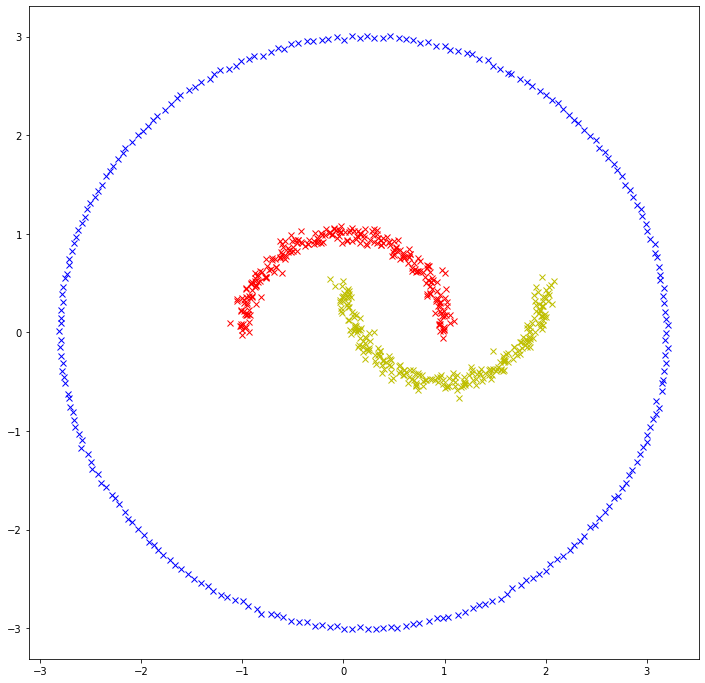

In [199]:
boundary, class1, class2=two_moon_circular_boundary(n=500, noise_input=0.05, plot=True, distance=1, n_boundary=500, noise_input_boundary=0.001)

In [201]:
X_try=np.hstack((boundary, class1, class2)).T
y_try= np.array([[k] * 250 for k in range(3)])
y_try=np.array(y_try).flatten()
print(X_try.shape,y_try.shape)

(750, 2) (750,)


We took a neural network with 4 hidden layers and a width of $7$.

In [203]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 7
hidden_layers = 4
input_dim = 2
output_dim = 3

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'prior': 'normal',
               'prior_parameters':{'mean': np.zeros(5), 'covariance_matrix': np.eye(5)},
               'likelihood': 'logistic',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nlm2 = NLM(architecture, random=random)
y_try_ = get_dummies(y_try).values
X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X_try,y_try_, train_size=0.9, random_state=random)

## B - Runnning MLE on the standard Neural Network 

We first use a frequentist approach.

In [204]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':8000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
#nlm.fit_MLE(x.T, y.reshape(1,-1), params)

nlm2.fit_MLE(X_train_try.T, y_train_try.T, params)

import pickle
filename = 'weights8000_two_moons'
f=open(filename,"wb" )
pickle.dump(nlm2.weights,f)
f.close()

Iteration 0 lower bound 8.894602100301517; gradient mag: 11.547196112056433
Iteration 100 lower bound 5.845304477532717; gradient mag: 2.0016291383139406
Iteration 200 lower bound 1.2924918030134072; gradient mag: 4.5040800306573505
Iteration 300 lower bound 0.592271513335073; gradient mag: 0.6448484364348961
Iteration 400 lower bound 0.48954377198424387; gradient mag: 0.40026369682194923
Iteration 500 lower bound 0.4353605743319622; gradient mag: 0.3210592317998467
Iteration 600 lower bound 0.3909753366316277; gradient mag: 0.3082339304247319
Iteration 700 lower bound 0.3446411145277853; gradient mag: 0.31158486588083995
Iteration 800 lower bound 0.29971393530951973; gradient mag: 0.29167742806999913
Iteration 900 lower bound 0.2588844484771123; gradient mag: 0.2699863975681392
Iteration 1000 lower bound 0.22388702598573082; gradient mag: 0.2360914728986268
Iteration 1100 lower bound 0.18512202051745677; gradient mag: 0.22076814715256707
Iteration 1200 lower bound 0.15891049336199733;

## C - Visualisation of the MLE decision boundary:

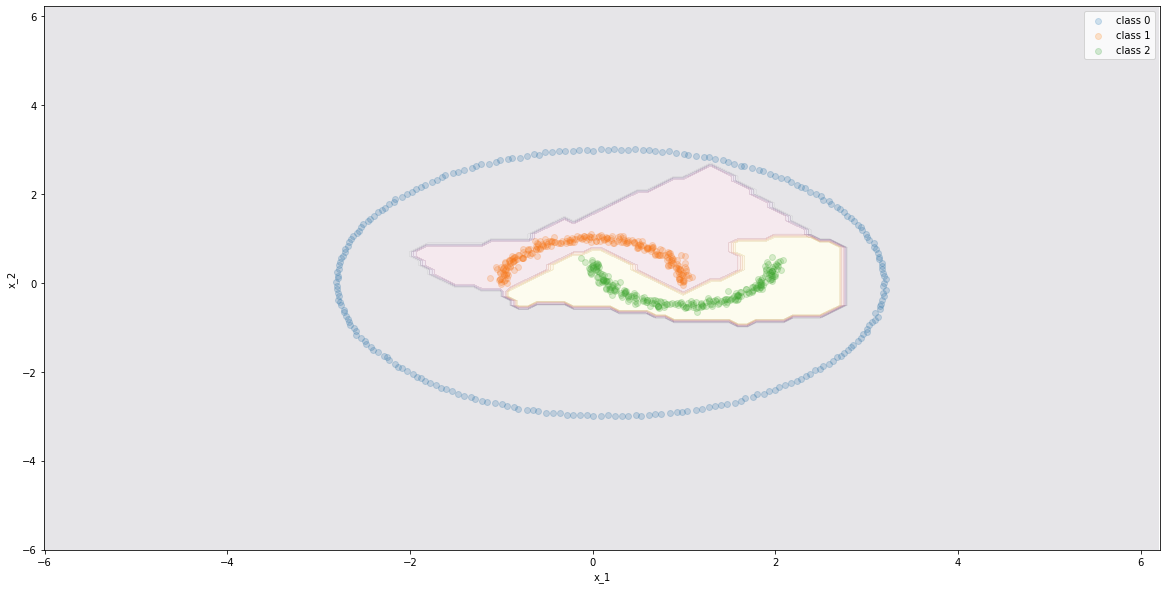

In [205]:
classifier2 = [Classifier(nlm2.weights, nlm2.forward)]
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, classifier2, ax)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_moons_8000_MLE')
plt.show()

## D - NLM: the BaCOUn framework

In [206]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}
mac=True
models2=nlm2.sample_models(X_train_try.T, y_train_try.T, params, 200, mac)

Currently fitting a Neural Network for the Classification task
Iteration 0 lower bound 0.17279484533875325; gradient mag: 0.00989756629928816
Iteration 100 lower bound 0.1620970015785292; gradient mag: 0.00977192196027435
Iteration 200 lower bound 0.1523402916690519; gradient mag: 0.009454484024428942
Iteration 300 lower bound 0.14341139188333543; gradient mag: 0.009336957395525997
Iteration 400 lower bound 0.13520563060614924; gradient mag: 0.008920599092031353
Iteration 500 lower bound 0.12786092882158784; gradient mag: 0.00898632354143689
Iteration 600 lower bound 0.12125777238993728; gradient mag: 0.008325954493182115
Iteration 700 lower bound 0.11532743410333869; gradient mag: 0.0089955445207569
Iteration 800 lower bound 0.11011140333370095; gradient mag: 0.008180363115225513
Iteration 900 lower bound 0.10542044393443557; gradient mag: 0.007553826831831191
Iteration 1000 lower bound 0.10121218058862085; gradient mag: 0.007355059413296887
Iteration 1100 lower bound 0.09750997523604

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 24000
Interrupted at 23,999 [11%]: Average Loss = 1,860.9
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, w]


Sampling 2 chains for 500 tune and 1_500 draw iterations (1_000 + 3_000 draws total) took 233 seconds.
There were 22 divergences after tuning. Increase `target_accept` or reparameterize.
There were 45 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.


(3000, 7, 3)
(3000, 3)
Posterior samples sampled !
(3000, 24)
Now, thanks to the posterior, we are going to create 200 different classification models


## E - Visualisation of some decision boundaries from the posterior

We plot 50 decision boundaries. This is already enough to get a sense of the diversity of possible boundaries.

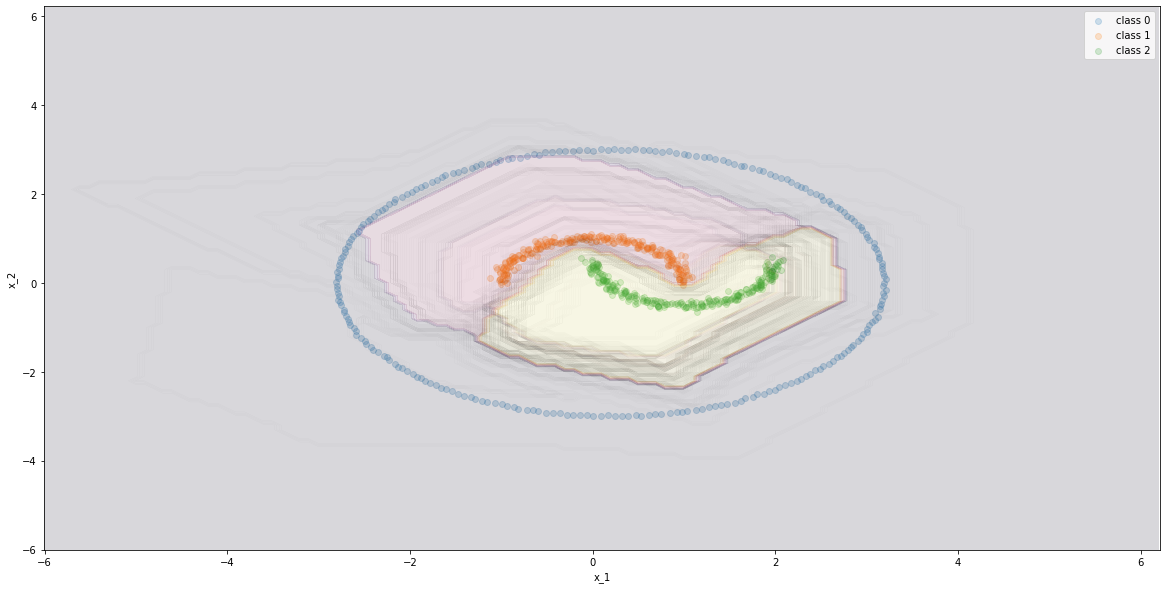

In [207]:
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, models2[114:164], ax)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_moons_1500_NLM')
plt.show()

## F - Uncertainty quantification

In [9]:
def plot_uncertainty(x, y, models, ax, func):
    # Plot data
    # from one-hot encode to array
    if y.shape[1] > 1:
        y = np.argmax(y, axis=1).flatten()
    num_classes = np.max(y) + 1
    for k in range(num_classes):
        ax.scatter(x[y == k, 0], x[y == k, 1], alpha=0.2, label='class ' + str(k))
    # Create mesh
    xmin = np.min(x.flatten()) - 2
    xmax = np.max(x.flatten()) + 2
    interval = np.arange(xmin, xmax, 0.1)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    alpha_line = 0.2
    linewidths = 0.1

    
    i = 0

    for model in models:
        yy = model.predict(xx)
        yy = np.array([func(x, models) for x in xx])
        yy = yy.reshape((n, n))

        # Plot decision surface
        x1 = x1.reshape(n, n)
        x2 = x2.reshape(n, n)
    
        ax.contourf(x1, x2, yy, alpha=0.1 * 1. / (i + 1) ** 2, cmap='inferno')
        ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line)

        i += 1


    ax.set_xlim((xmin, xmax))
    ax.set_ylim((xmin, xmax))
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.legend(loc='best')
    return ax

### i - Total uncertainty

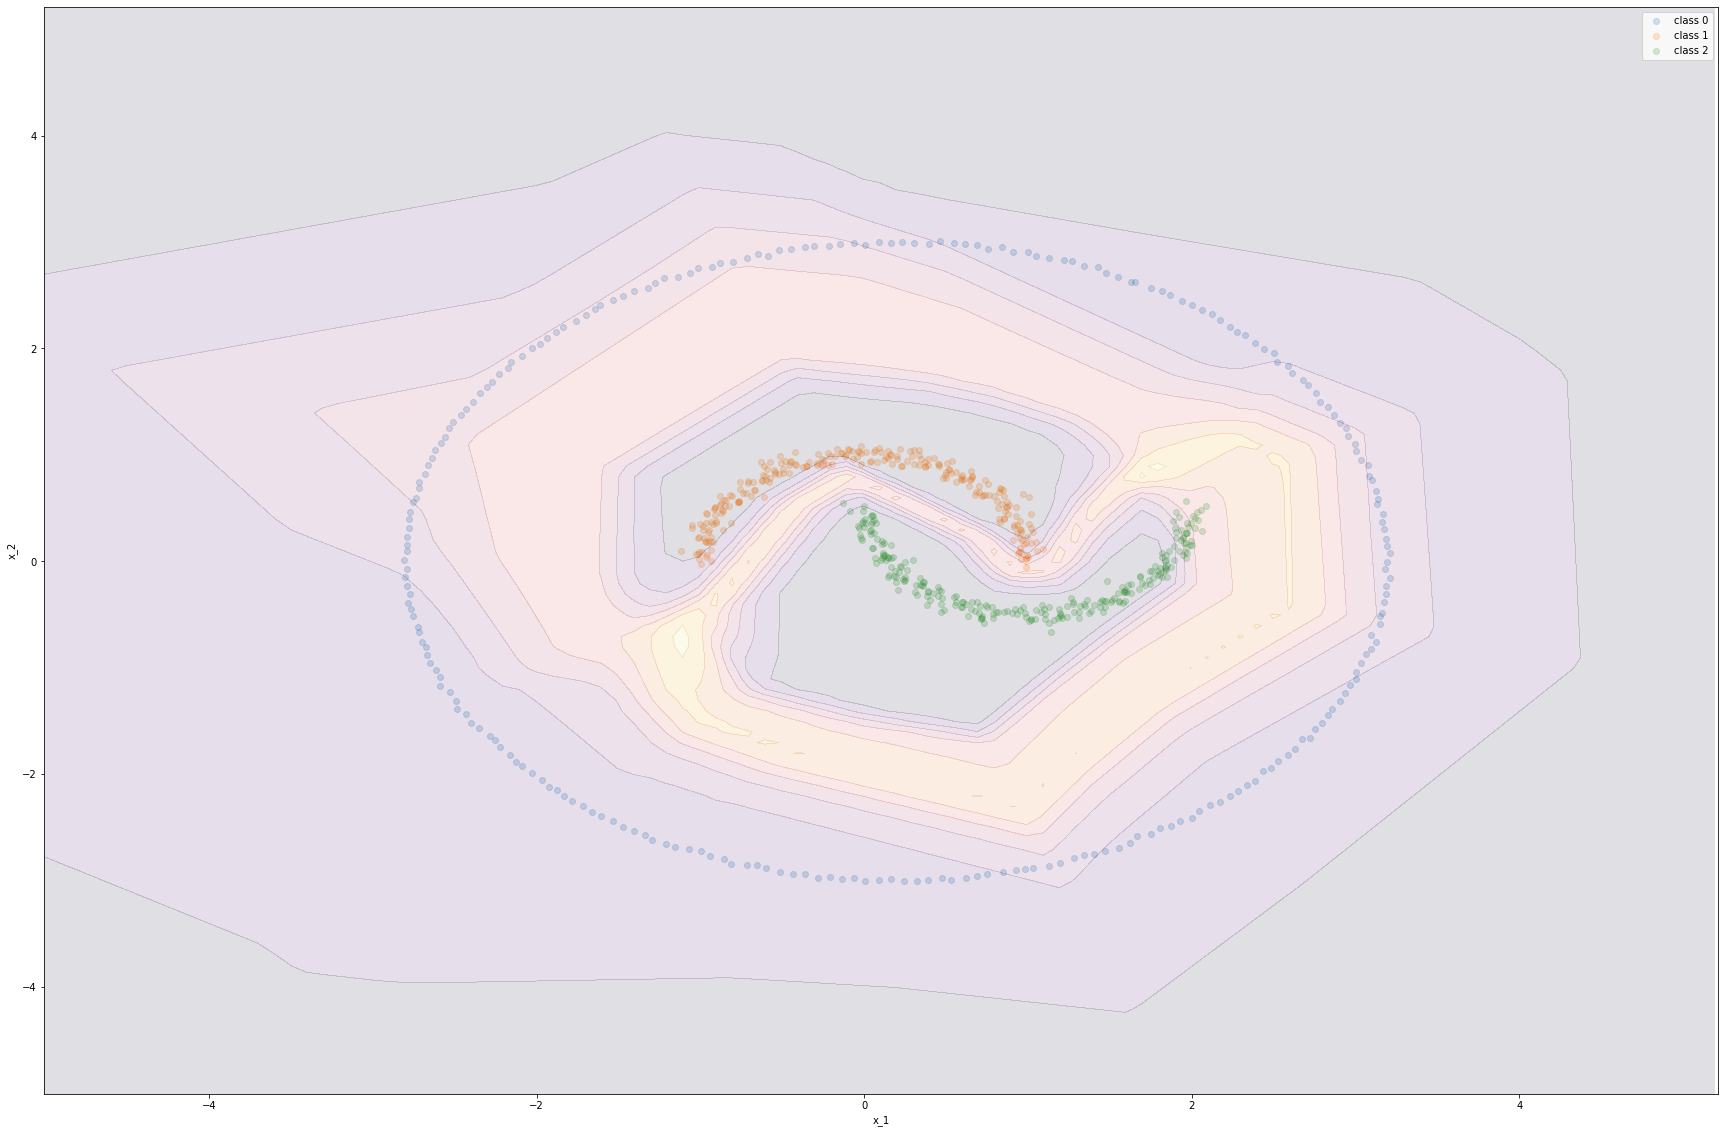

In [216]:
fig, axes = plt.subplots(1, 1, figsize=(30, 20))
plot_uncertainty(X_try, y_try_, models2[114:164], axes, total_uncertainty)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_moons_8000_NLM_uncertainty_total')
plt.show()

### ii - Expected aleatoric uncertainty

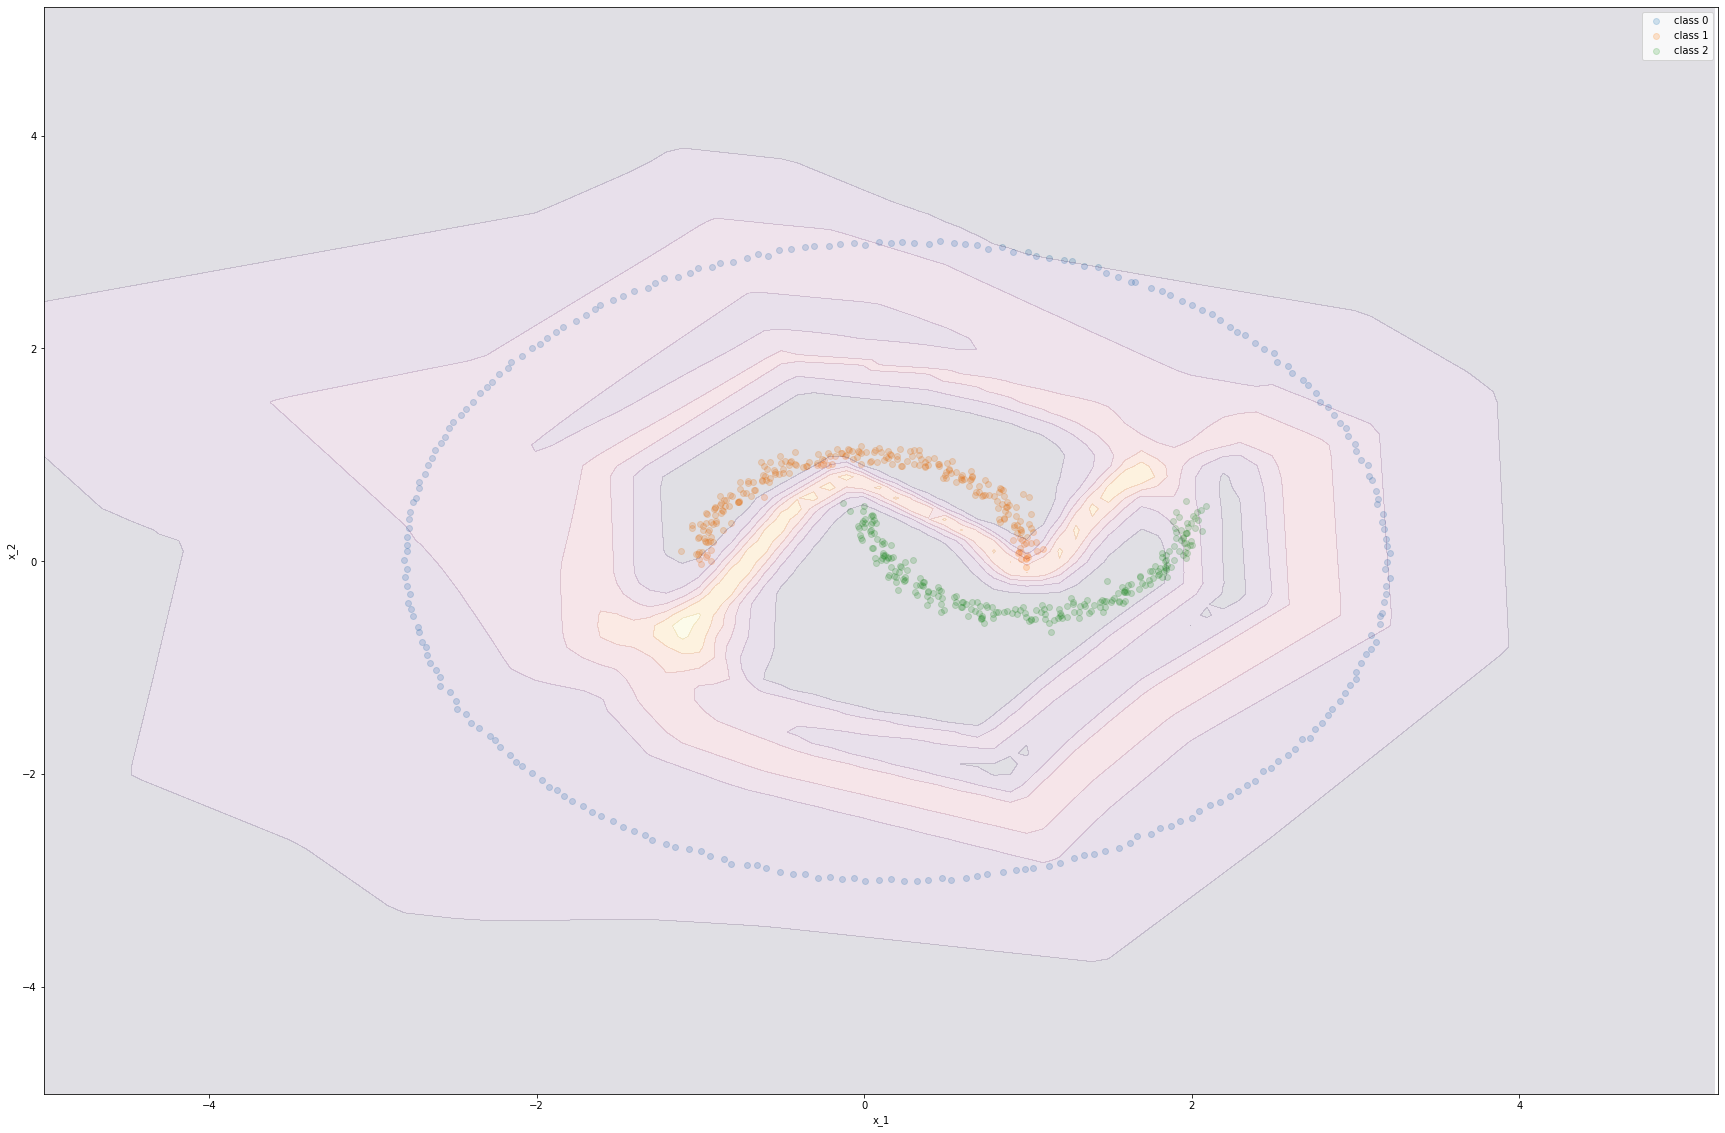

In [224]:
fig, axes = plt.subplots(1, 1, figsize=(30, 20))
plot_uncertainty(X_try, y_try_, models2[114:164], axes, expected_aleatoric_uncertainty)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_moons_8000_NLM_uncertainty_aleatoric')
plt.show()

We see that we have aleatoric uncertainty in regions of class overlap.

### iii - Epistemic uncertainty

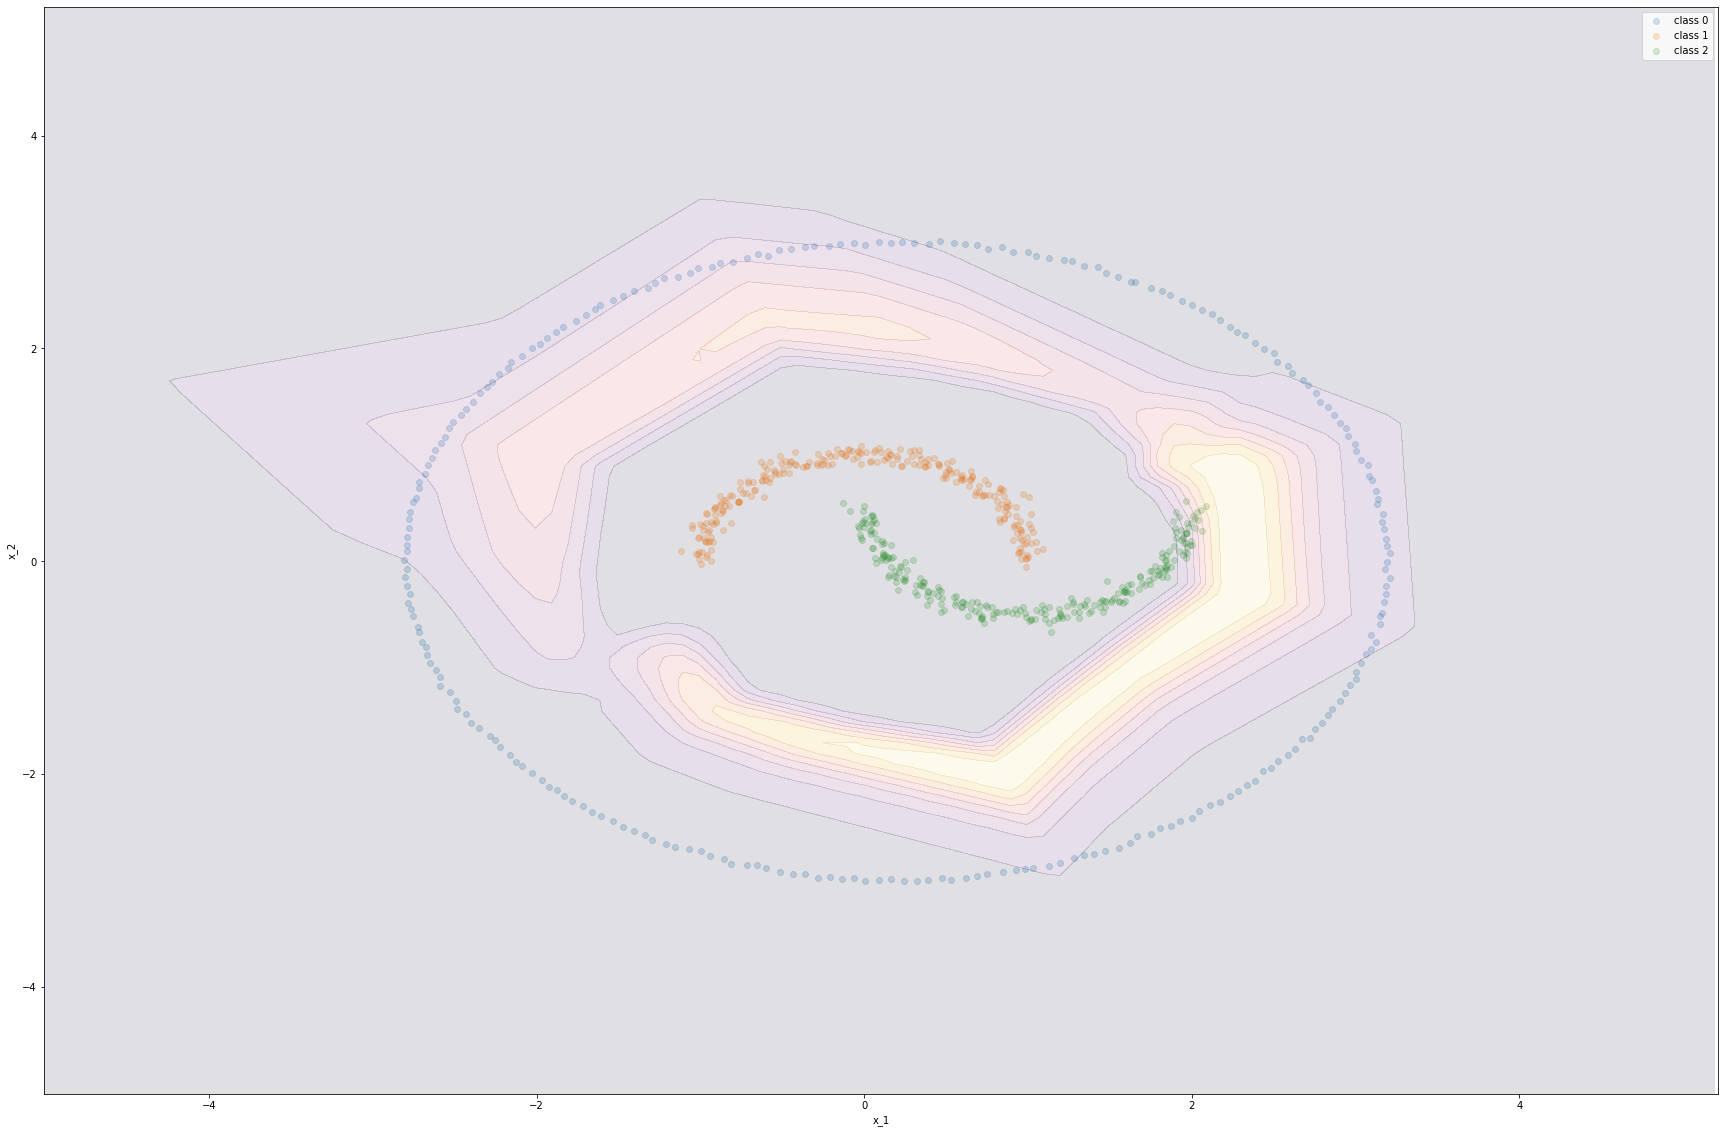

In [225]:
fig, axes = plt.subplots(1, 1, figsize=(30, 20))
plot_uncertainty(X_try, y_try_, models2[114:164], axes, epistemic_uncertainty)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_moons_8000_NLM_uncertainty_epistemic')
plt.show()

We see more espistemic uncertainty far away from data points and no epistemic uncertainty in regions of class overlap. Note that if we increased the distance of our boundary class from our data, we would get more epistemic uncertainty further away from the data. In the case presented above, though, we are able to distinguish OOD points from non-OOD points within the boundary class circle only.

# III - Demonstration on at least one instance of failure mode of the model

We now have an example for which the uncertainties are not correct. This is probably due to the architecture we specified (the network is node wide enough or deep enough).

In [38]:
from Toy_Datasets.Toy_Datasets_2D import create_two_classes_circular_boundary
from Neural_Network import NLM,Classifier
import autograd.numpy as np
from sklearn.linear_model import LogisticRegression
from autograd import grad
import autograd.numpy as np
from autograd import grad
import matplotlib.pyplot as plt
from autograd.misc.optimizers import adam
from sklearn.model_selection import train_test_split
from pandas import get_dummies
from Entropy import  epistemic_uncertainty, expected_aleatoric_uncertainty, total_uncertainty

In [39]:
from Toy_Datasets.Toy_Datasets import plot_decision_boundary

## A - Creating the dataset for BaCOUn

In [40]:
from pandas import get_dummies

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
from Toy_Datasets.Toy_Datasets_2D import create_two_circular_classes_outer

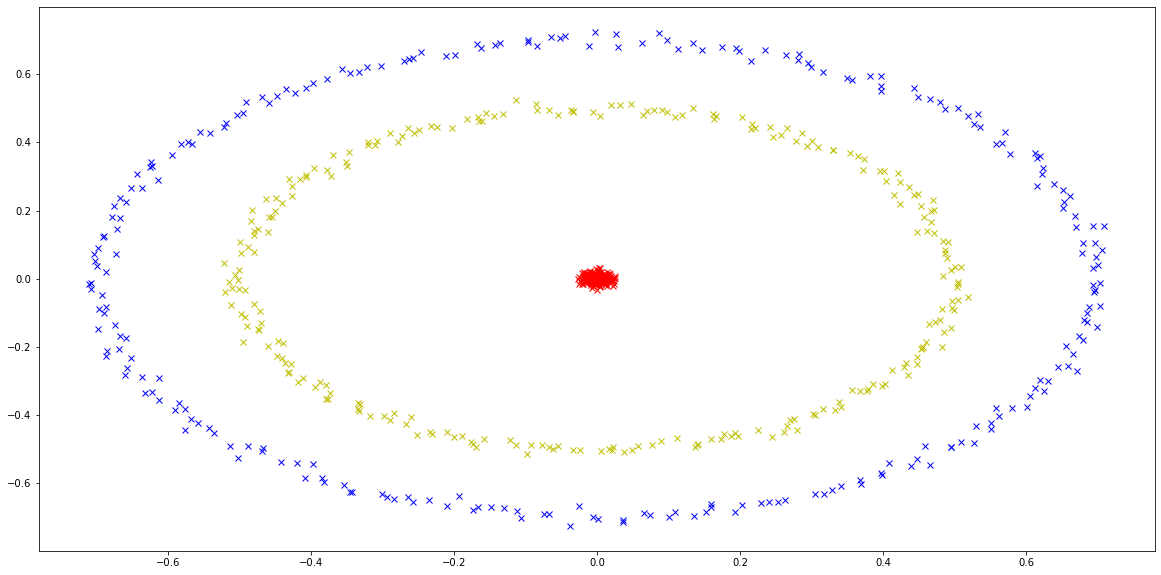

In [43]:
boundary, class1, class2=create_two_circular_classes_outer(n=500, noise_input=0.01, plot=True)

In [44]:
X_try=np.hstack((boundary, class1, class2)).T
y_try= np.array([[k] * 250 for k in range(3)])
y_try=np.array(y_try).flatten()
print(X_try.shape,y_try.shape)

(750, 2) (750,)


In [45]:
###relu activation
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)


###neural network model design choices
width = 5
hidden_layers = 3
input_dim = 2
output_dim = 3

architecture = {'width': width,
               'hidden_layers': hidden_layers,
               'input_dim': input_dim,
               'output_dim': output_dim,
               'activation_fn_type': 'relu',
               'activation_fn_params': 'rate=1',
               'prior': 'normal',
               'prior_parameters':{'mean': np.zeros(5), 'covariance_matrix': np.eye(5)},
               'likelihood': 'logistic',
               'activation_fn': activation_fn}

#set random state to make the experiments replicable
rand_state = 0
random = np.random.RandomState(rand_state)

#instantiate a Feedforward neural network object
nlm2 = NLM(architecture, random=random)
y_try_ = get_dummies(y_try).values
X_train_try, X_test_try, y_train_try, y_test_try = train_test_split(X_try,y_try_, train_size=0.9, random_state=random)

## B - Runnning MLE on the standard Neural Network 

In [46]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':8000, 
          'random_restarts':1}

#fit my neural network to minimize MSE on the given data
#nlm.fit_MLE(x.T, y.reshape(1,-1), params)

nlm2.fit_MLE(X_train_try.T, y_train_try.T, params)

import pickle
filename = 'weights8000_two_circles'
f=open(filename,"wb" )
pickle.dump(nlm2.weights,f)
f.close()

Iteration 0 lower bound 1.4505190250909443; gradient mag: 0.9401786579445053
Iteration 100 lower bound 1.2726552284235717; gradient mag: 0.38175981425785555
Iteration 200 lower bound 1.1817146577626079; gradient mag: 0.2745095390648424
Iteration 300 lower bound 1.1044258453376141; gradient mag: 0.2273784379298003
Iteration 400 lower bound 1.0602891626651632; gradient mag: 0.19367643295795992
Iteration 500 lower bound 1.023554943434798; gradient mag: 0.16209731735600186
Iteration 600 lower bound 0.9837161604164336; gradient mag: 0.15529559751693356
Iteration 700 lower bound 0.9377481662014591; gradient mag: 0.10852043136438967
Iteration 800 lower bound 0.9031884143829777; gradient mag: 0.08666300428175572
Iteration 900 lower bound 0.8659089495653873; gradient mag: 0.10498348839134138
Iteration 1000 lower bound 0.7985229977742818; gradient mag: 0.13845527845202726
Iteration 1100 lower bound 0.6861899512500196; gradient mag: 0.18136880922598883
Iteration 1200 lower bound 0.612351637587341

## C - Visualisation of the MLE decision boundary:

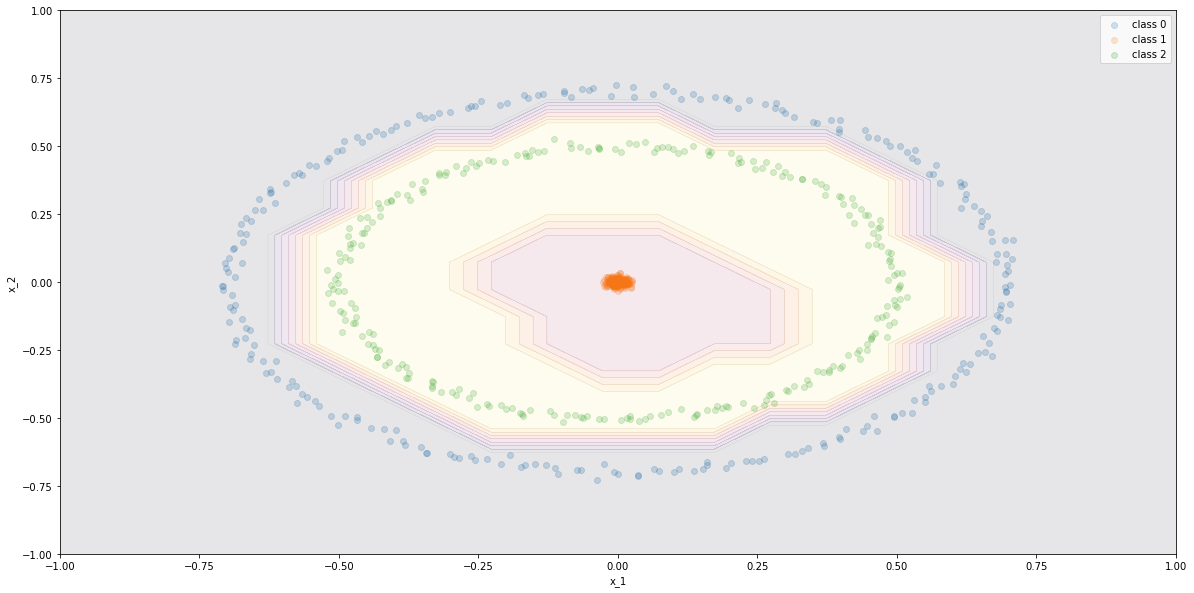

In [49]:
classifier2 = [Classifier(nlm2.weights, nlm2.forward)]
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, classifier2, ax)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_circles_8000')
plt.show()

## D - NLM: the BaCOUn framework

In [50]:
###define design choices in gradient descent
params = {'step_size':1e-3, 
          'max_iteration':5000, 
          'random_restarts':1}
mac=True
models2=nlm2.sample_models(X_train_try.T, y_train_try.T, params, 200, mac)

Currently fitting a Neural Network for the Classification task
Iteration 0 lower bound 0.15014377958214495; gradient mag: 0.009943025965412881
Iteration 100 lower bound 0.14289550398787515; gradient mag: 0.009644630227552613
Iteration 200 lower bound 0.1366996057919308; gradient mag: 0.008909987532918669
Iteration 300 lower bound 0.13157656716181818; gradient mag: 0.008176520749508517
Iteration 400 lower bound 0.12719519432542697; gradient mag: 0.007580706750356386
Iteration 500 lower bound 0.12334561753364094; gradient mag: 0.007181267656948782
Iteration 600 lower bound 0.11983905607640871; gradient mag: 0.006767771182678
Iteration 700 lower bound 0.11674314943813148; gradient mag: 0.006444665365549617
Iteration 800 lower bound 0.11391989040950382; gradient mag: 0.006102919305728557
Iteration 900 lower bound 0.11133904089125268; gradient mag: 0.005814582107713337
Iteration 1000 lower bound 0.10902515142954651; gradient mag: 0.005583464720420353
Iteration 1100 lower bound 0.10695654172

Auto-assigning NUTS sampler...
Initializing NUTS using advi...


Convergence achieved at 20300
Interrupted at 20,299 [10%]: Average Loss = 2,855.4
Sequential sampling (2 chains in 1 job)
NUTS: [intercept, w]


Sampling 2 chains for 500 tune and 1_500 draw iterations (1_000 + 3_000 draws total) took 771 seconds.
The number of effective samples is smaller than 25% for some parameters.


(3000, 5, 3)
(3000, 3)
Posterior samples sampled !
(3000, 18)
Now, thanks to the posterior, we are going to create 200 different classification models


## E - Visualisation of some decision boundaries from the posterior

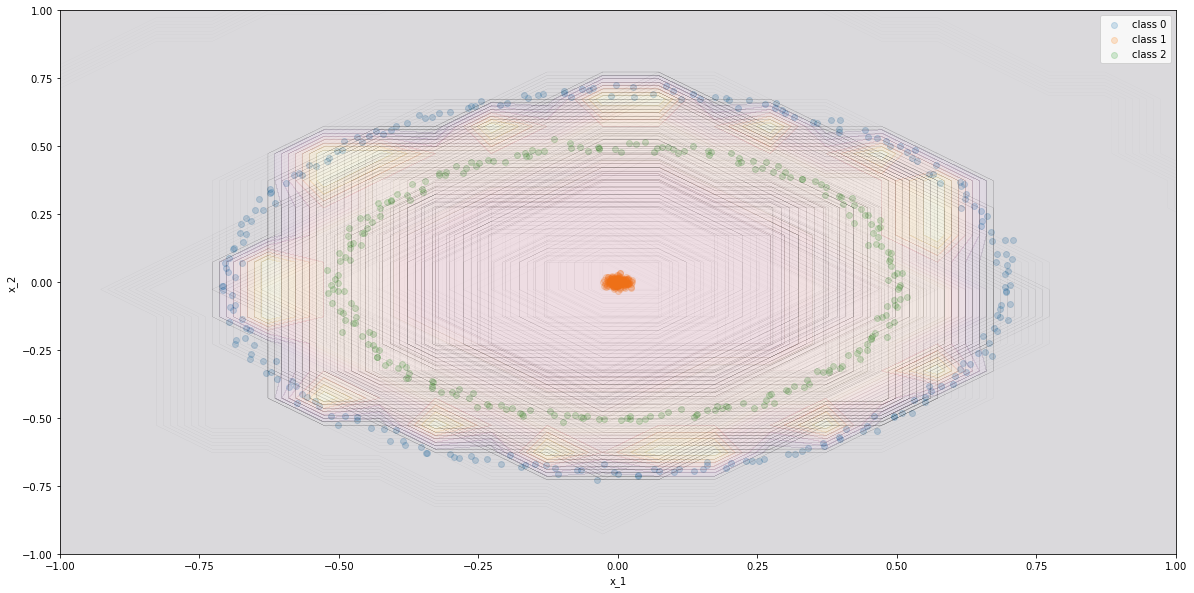

In [53]:
fig, ax = plt.subplots(1, figsize=(20, 10))
plot_decision_boundary(X_try, y_try_, models2[64:164], ax)
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_circles_8000_NLM')
plt.show()

We see that the NLM is not able to correctly classify the 3 classes anymore.

## F - Uncertainty qunatification

In [54]:
def plot_uncertainty(x, y, models, ax, func):
    # Plot data
    # from one-hot encode to array
    if y.shape[1] > 1:
        y = np.argmax(y, axis=1).flatten()
    num_classes = np.max(y) + 1
    for k in range(num_classes):
        ax.scatter(x[y == k, 0], x[y == k, 1], alpha=0.2, label='class ' + str(k))
    # Create mesh
    xmin = np.min(x.flatten()) - 2
    xmax = np.max(x.flatten()) + 2
    interval = np.arange(xmin, xmax, 0.1)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    alpha_line = 0.2
    linewidths = 0.1

    
    i = 0

    for model in models:
        yy = model.predict(xx)
        yy = np.array([func(x, models) for x in xx])
        yy = yy.reshape((n, n))

        # Plot decision surface
        x1 = x1.reshape(n, n)
        x2 = x2.reshape(n, n)
    
        ax.contourf(x1, x2, yy, alpha=0.1 * 1. / (i + 1) ** 2, cmap='inferno')
        ax.contour(x1, x2, yy, colors='black', linewidths=linewidths, alpha=alpha_line)

        i += 1


    ax.set_xlim((xmin, xmax))
    ax.set_ylim((xmin, xmax))
    ax.set_xlabel('x_1')
    ax.set_ylabel('x_2')
    ax.legend(loc='best')
    return ax

### i - Total uncertainty

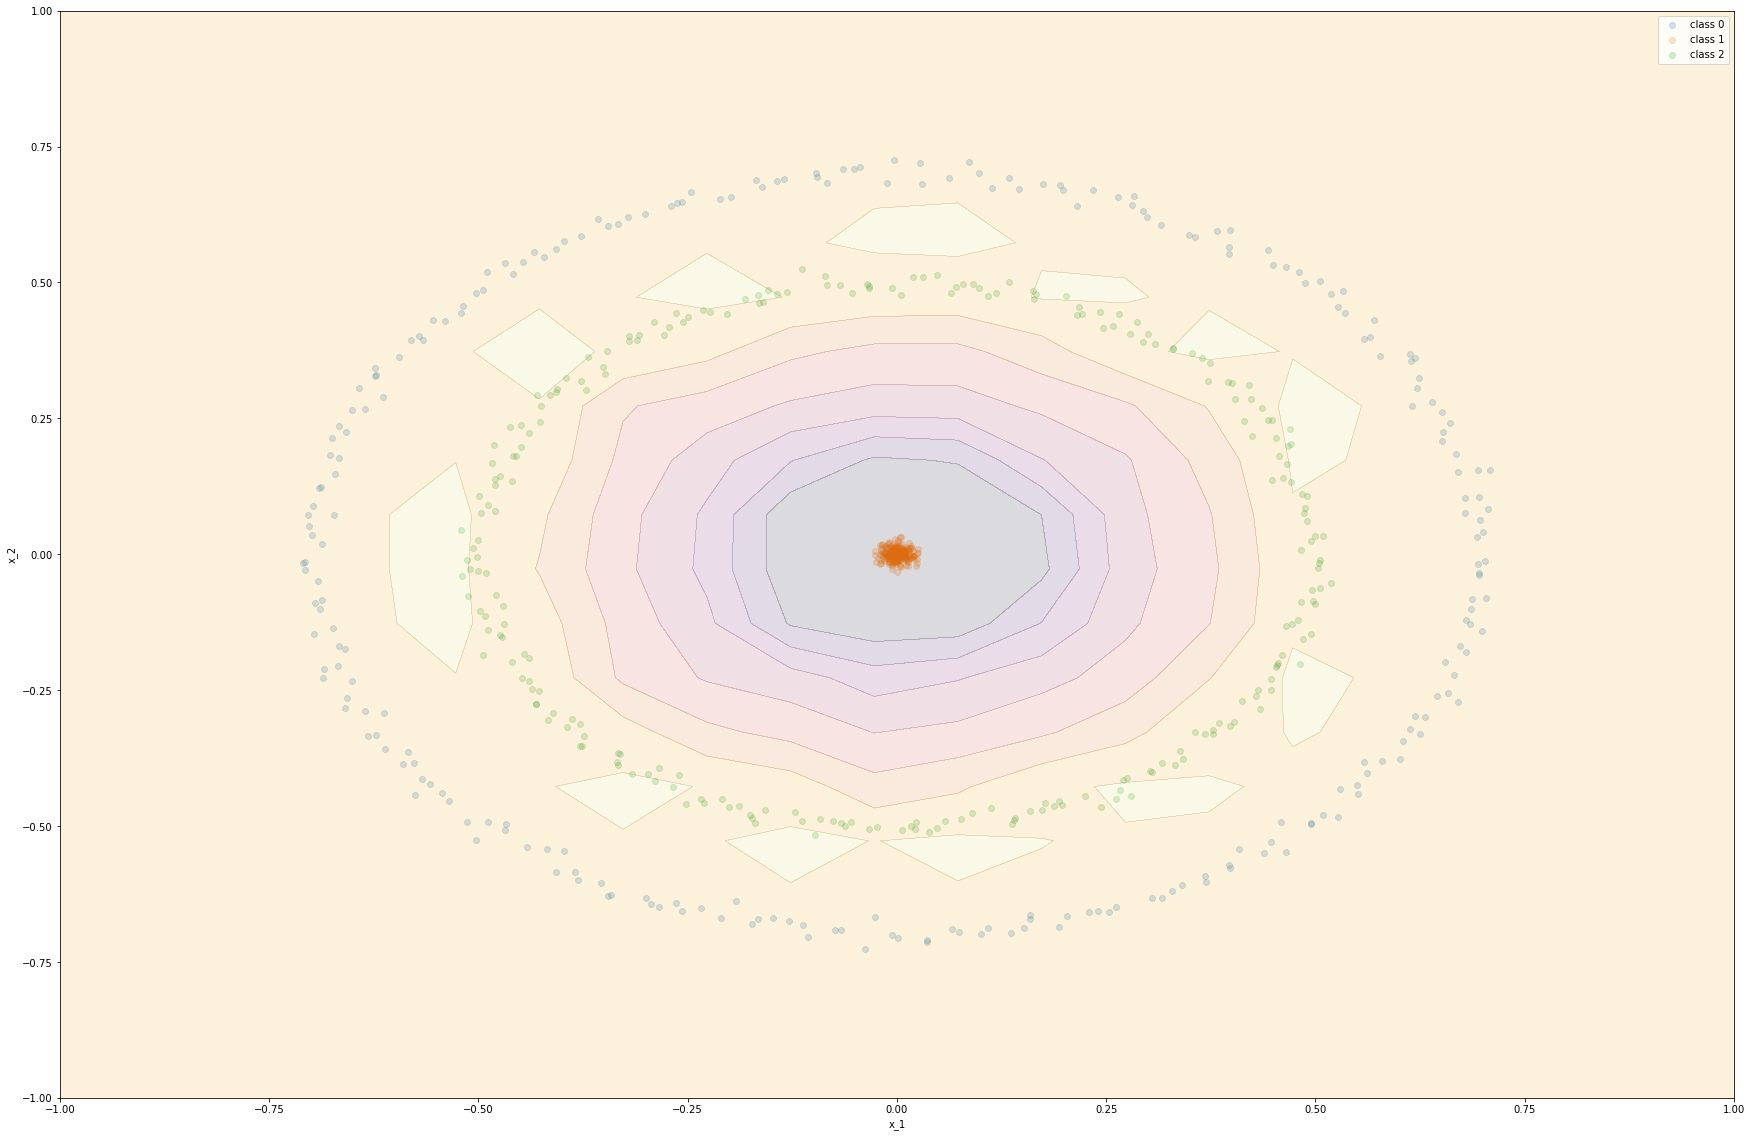

In [57]:
fig, axes = plt.subplots(1, 1, figsize=(30, 20))
plot_uncertainty(X_try, y_try_, models2[114:164], axes, total_uncertainty)
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_circles_8000_NLM_uncertainty_total')
plt.show()

### ii - Expected aleatoric uncertainty

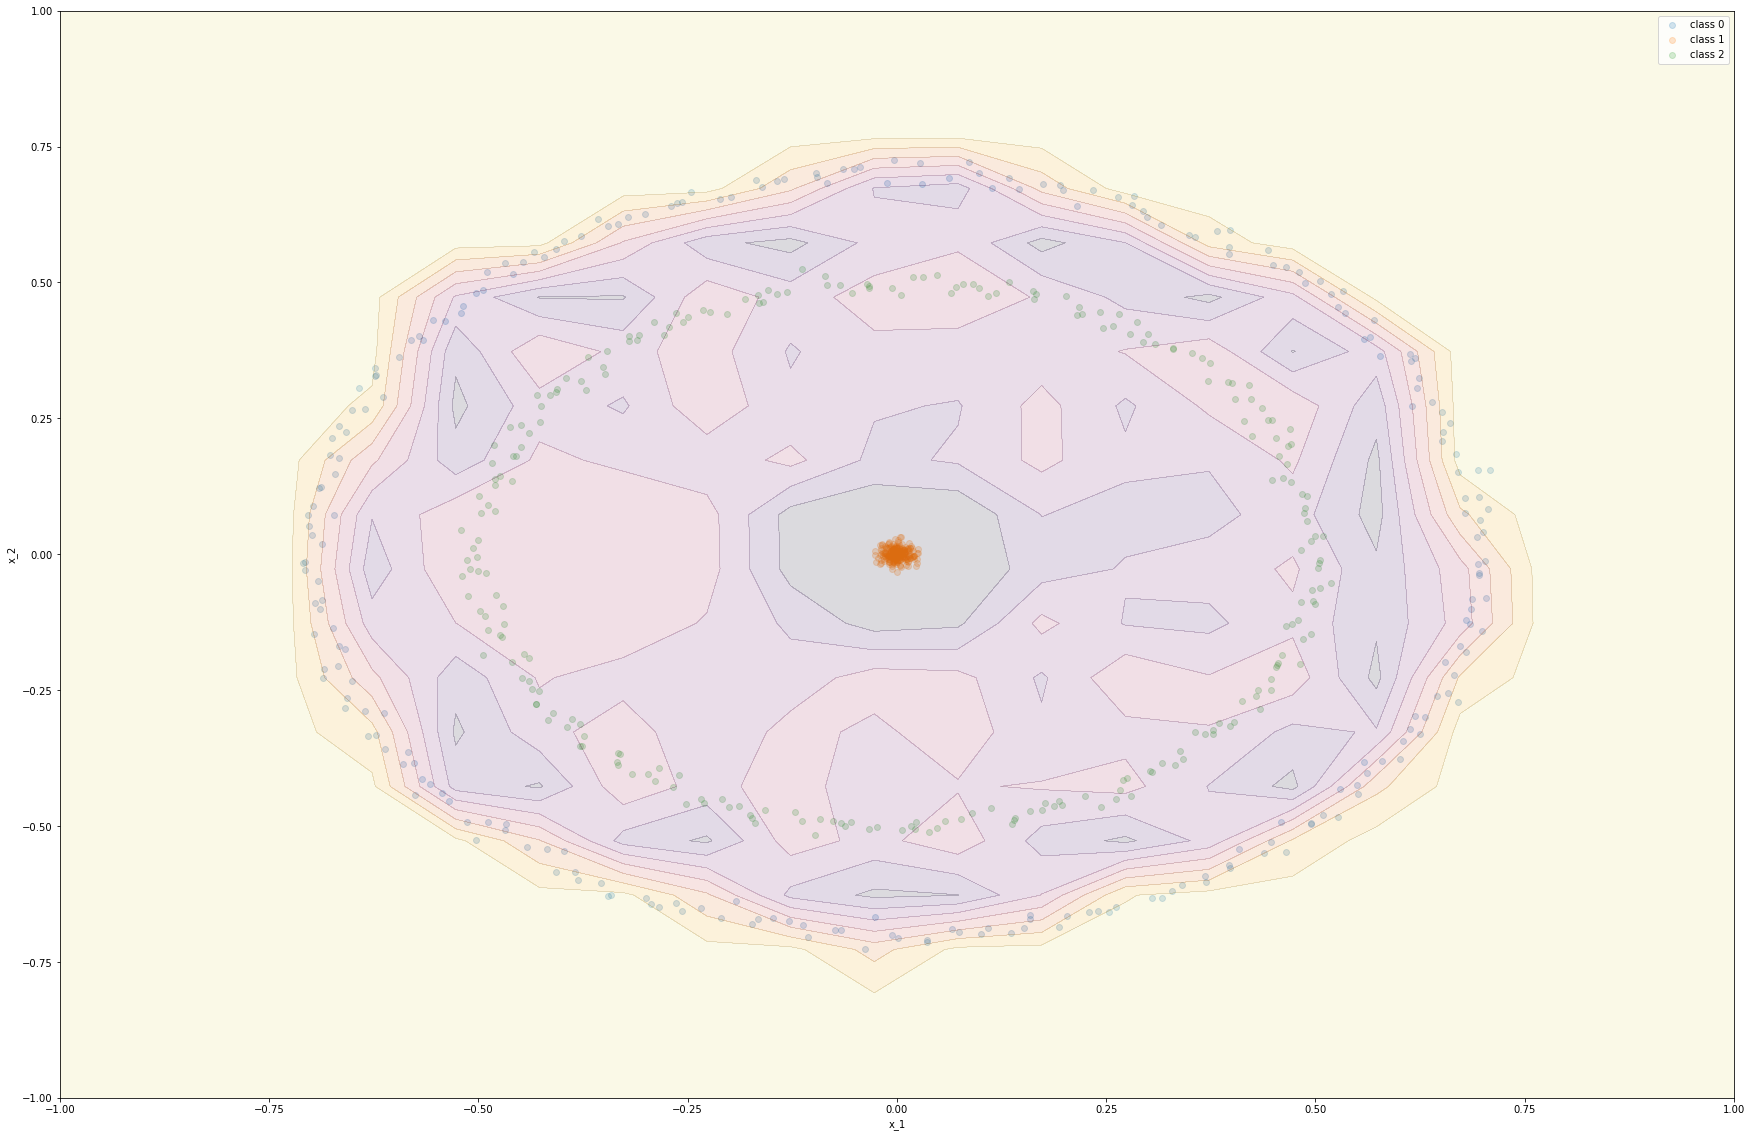

In [58]:
fig, axes = plt.subplots(1, 1, figsize=(30, 20))
plot_uncertainty(X_try, y_try_, models2[114:164], axes, expected_aleatoric_uncertainty)
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_circles_8000_NLM_uncertainty_aleatoric')
plt.show()

### iii - Epistemic uncertainty

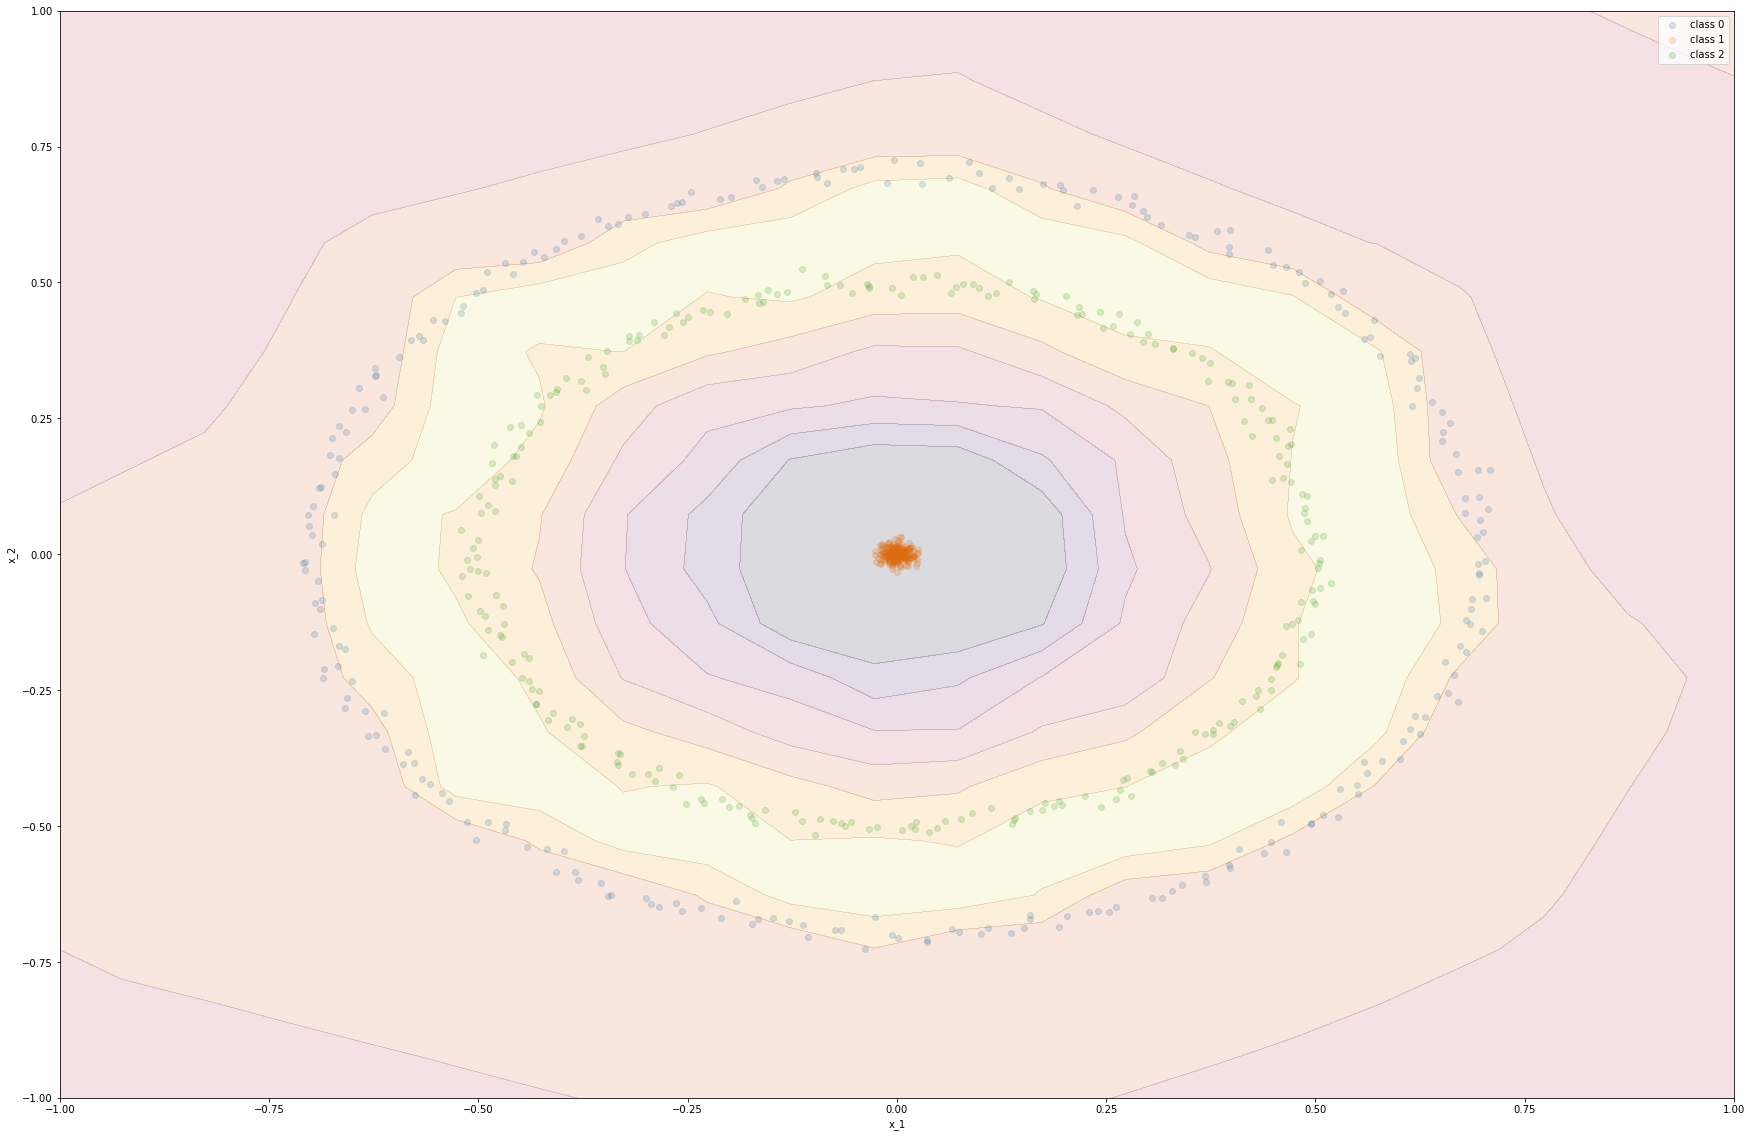

In [60]:
fig, axes = plt.subplots(1, 1, figsize=(30, 20))
plot_uncertainty(X_try, y_try_, models2[114:164], axes, epistemic_uncertainty)
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)
plt.savefig('/Users/pellegrinraphael/Desktop/Harvard/AM207/GithubBacoun/Fall/Experiments/2_circles_8000_NLM_uncertainty_epistemic')
plt.show()